
# PLANEACION DEL PROYECTO:

* COMPARAR NUESTRAS VARIABLES TANTO NUMERICAS COMO CATEGORICAS VS (PROFYT, SALES), UNA VEZ DETERMINADA LA RELACIÓN VEMOS EL NIVEL DE CORRLEACIÓN Y SI IMPACTA EN NUETRA TARGET SE MANTIENE LA VARIABLE SINO SE DROPEA.

* PARTE 1

GRAFICOS DE DISTRIBUCION 1 VARIABLE
GRAFICOS DE DOS VARIABLES 1 VS 1
GRAFICOS ELABORADOS CON GROUP BY.
GRAFICOS BOXPLOT, VIOLIN PLOT.

* PARTE 2
LIMPIEZA
CODIFICACION
NORMALIZACION
EXTREMOS

* PARTE 3
MODELAMIENTO
REGRESION
MULTICLASIFICACION
PERFILAMIENTO

* PARTE 4
 CONCLUISONES


 ## FECHA LIMITE DE TERMINACION SABADO 9 DE DICIEMBRE


# PREGUNTAS A RESPONDER:

* ¿EXISTEN ALGUNOS CLIENTES QUE SON REGULARES? SI ES ASI, ¿CUALES DE ELLOS GENERAN MAYORES GANANCIAS?
* ¿CUALES SUBCATEGORIAS DE PRODUCTOS SON LOS RESPONSABLES POR LA MAYORIA DE LAS GANANCIAS NEGATIVAS DE LAS VENTAS?
* ¿HAY ALGUNA TENDENCIA CON RESPECTO A COMO SE VENDEN LOS DIFERENTES PRODUCTOS RESPECTO AL TIEMPO?
* ¿HAY ALGUN PATRON CON RESPECTO A COMO LAS DIFERENTES SUB CATEGORIAS DE PRODUCTOS SE VENDEN EN LOS DIFERENTES MERCADOS?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)

# Lectura de Datos

In [ ]:
#df = pd.read_csv("data.csv",delimiter=";")
df = pd.read_csv("/content/drive/MyDrive/BEDU_SANTANDER/PROYECTO_2_SUPER_STORE/superstore.csv")
df.head()

row_id         order_id order_date ship_date       ship_mode customer_id  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     customer_name      segment         city            state    country  \
0  Toby Braunhardt     Consumer  Constantine      Constantine    Algeria   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  Australia   
2    Annie Thurman     Consumer     Budapest         Budapest    Hungary   
3     Eugene Moren  Home Office    Stockholm        Stockholm     Sweden   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  Australia   

   postal_code  market   region        product_id         category  \
0          NaN  Africa   Africa  OFF-TEN-10000025  Office Supplies   
1          NaN    APAC  Oceania   OFF-SU-10000618  Office Supplies   
2          NaN    EMEA     EMEA  OFF-TEN-10001585  Office Supplies   
3          NaN      EU    North   OFF-PA-10001492  Office Supplies   
4          NaN    APAC  Oceania   FUR-FU-10003447        Furniture   

  sub-category                 product_name    sales  quantity  discount  \
0      Storage          Tenex Lockers, Blue  408.300         2       0.0   
1     Supplies     Acme Trimmer, High Speed  120.366         3       0.1   
2      Storage      Tenex Box, Single Width   66.120         4       0.0   
3        Paper  Enermax Note Cards, Premium   44.865         3       0.5   
4  Furnishings   Eldon Light Bulb, Duo Pack  113.670         5       0.1   

    profit  shipping_cost order_priority  
0  106.140          35.46         Medium  
1   36.036           9.72         Medium  
2   29.640           8.17           High  
3  -26.055           4.82           High  
4   37.770           4.70         Medium

In [ ]:
df.shape

(51290, 24)

In [ ]:
for c in df.columns:
    print( c, df[c].map(type).unique().tolist(), "\n"*1)

row_id [<class 'int'>] 

order_id [<class 'str'>] 

order_date [<class 'str'>] 

ship_date [<class 'str'>] 

ship_mode [<class 'str'>] 

customer_id [<class 'str'>] 

customer_name [<class 'str'>] 

segment [<class 'str'>] 

city [<class 'str'>] 

state [<class 'str'>] 

country [<class 'str'>] 

postal_code [<class 'float'>] 

market [<class 'str'>] 

region [<class 'str'>] 

product_id [<class 'str'>] 

category [<class 'str'>] 

sub-category [<class 'str'>] 

product_name [<class 'str'>] 

sales [<class 'float'>] 

quantity [<class 'int'>] 

discount [<class 'float'>] 

profit [<class 'float'>] 

shipping_cost [<class 'float'>] 

order_priority [<class 'str'>] 



# Preprocesamiento

In [ ]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [ ]:
df.shape

(51290, 24)

In [ ]:
df.isna().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub-category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [ ]:
# Postal Code tiene el 80% de nulos, por lo tanto eliminas toda la columna.
df.isna().sum()/len(df)

row_id            0.000000
order_id          0.000000
order_date        0.000000
ship_date         0.000000
ship_mode         0.000000
customer_id       0.000000
customer_name     0.000000
segment           0.000000
city              0.000000
state             0.000000
country           0.000000
postal_code       0.805147
market            0.000000
region            0.000000
product_id        0.000000
category          0.000000
sub-category      0.000000
product_name      0.000000
sales             0.000000
quantity          0.000000
discount          0.000000
profit            0.000000
shipping_cost     0.000000
order_priority    0.000000
dtype: float64

In [ ]:
df.drop('postal_code', axis=1, inplace=True)

In [ ]:
df.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

In [ ]:
# Revisamos duplicados
df.duplicated().sum()

0

# EDA

In [ ]:
# Como primer objetivo obtener una regresión para las variables sales y profit.
target = ['sales', 'profit']

In [ ]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [ ]:
df.head(1)

row_id      order_id order_date ship_date       ship_mode customer_id  \
0   42433  AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   

     customer_name   segment         city        state  country  market  \
0  Toby Braunhardt  Consumer  Constantine  Constantine  Algeria  Africa   

   region        product_id         category sub-category  \
0  Africa  OFF-TEN-10000025  Office Supplies      Storage   

          product_name  sales  quantity  discount  profit  shipping_cost  \
0  Tenex Lockers, Blue  408.3         2       0.0  106.14          35.46   

  order_priority  
0         Medium

In [ ]:
varc = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

In [ ]:
vard = ['order_id', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'region', 'market', 'category', 'sub-category', 'product_name', 'order_priority']

In [ ]:
df[varc].describe(percentiles = [0.01, 0.05, .25, .75, .95, .99])

sales      quantity      discount        profit  shipping_cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.490581      3.476545      0.142908     28.610982      26.375915
std      487.565361      2.278766      0.212280    174.340972      57.296804
min        0.444000      1.000000      0.000000  -6599.978000       0.000000
1%         3.690000      1.000000      0.000000   -351.505650       0.200000
5%         8.800000      1.000000      0.000000    -83.904750       0.610000
25%       30.758625      2.000000      0.000000      0.000000       2.610000
50%       85.053000      3.000000      0.000000      9.240000       7.790000
75%      251.053200      5.000000      0.200000     36.810000      24.450000
95%     1015.955640      8.000000      0.600000    211.500000     111.409500
99%     2301.000000     11.000000      0.700000    587.359950     286.754300
max    22638.480000     14.000000      0.850000   8399.976000     933.570000

In [ ]:
df.groupby(["ship_mode","order_priority",'category'])[['sales', 'discount',
       'profit', 'shipping_cost']].mean()


sales  discount  \
ship_mode      order_priority category                                
First Class    Critical       Furniture        397.129866  0.141818   
                              Office Supplies  126.661999  0.143469   
                              Technology       437.447099  0.138320   
               High           Furniture        424.920079  0.172163   
                              Office Supplies  115.624122  0.143573   
                              Technology       460.547588  0.152458   
               Medium         Furniture        400.513321  0.176460   
                              Office Supplies  125.341824  0.146989   
                              Technology       491.820949  0.139621   
Same Day       Critical       Furniture        419.771417  0.152520   
                              Office Supplies  112.804900  0.116939   
                              Technology       518.155856  0.147551   
               High           Furniture        384.110905  0.178008   
                              Office Supplies  118.595921  0.150946   
                              Technology       519.354052  0.151386   
               Medium         Furniture        385.767780  0.149440   
                              Office Supplies  119.950161  0.120845   
                              Technology       533.849345  0.168388   
Second Class   Critical       Furniture        450.873581  0.165630   
                              Office Supplies  140.202417  0.128545   
                              Technology       514.018533  0.122347   
               High           Furniture        410.641145  0.167645   
                              Office Supplies  124.408998  0.130549   
                              Technology       452.282938  0.133598   
               Medium         Furniture        409.779197  0.183231   
                              Office Supplies  124.993217  0.136840   
                              Technology       463.811286  0.130084   
Standard Class High           Furniture        418.480085  0.167881   
                              Office Supplies  118.711433  0.135630   
                              Technology       477.186871  0.128576   
               Low            Furniture        406.804642  0.173208   
                              Office Supplies  118.313119  0.137909   
                              Technology       430.105449  0.123917   
               Medium         Furniture        421.722499  0.165310   
                              Office Supplies  119.771989  0.137909   
                              Technology       463.985534  0.135305   

                                                  profit  shipping_cost  
ship_mode      order_priority category                                   
First Class    Critical       Furniture        53.093399     107.268416  
                              Office Supplies  14.515780      29.068152  
                              Technology       66.307764     112.768609  
               High           Furniture        26.721000      68.259953  
                              Office Supplies  13.958560      19.305089  
                              Technology       54.774336      73.541304  
               Medium         Furniture        23.572242      50.295398  
                              Office Supplies  18.242413      14.673477  
                              Technology       69.365351      53.727946  
Same Day       Critical       Furniture        44.377157     110.746299  
                              Office Supplies  19.928010      29.417736  
                              Technology       31.068475     136.756884  
               High           Furniture        31.185541      59.716289  
                              Office Supplies  14.810819      18.430078  
                              Technology       61.419839      86.366598  
               Medium         Furniture        41.424208      42.934400  
                     

## Variables Numéricas

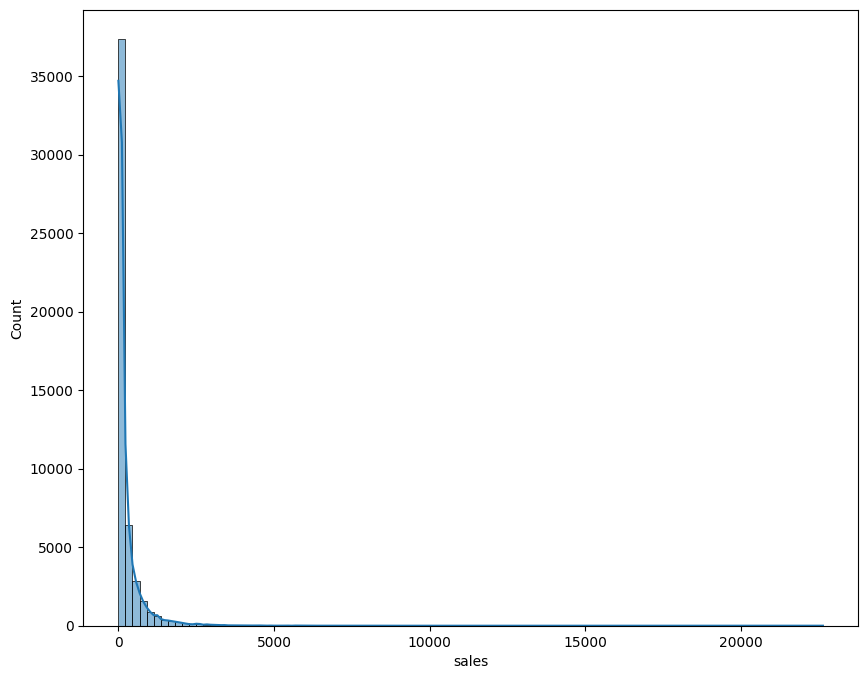

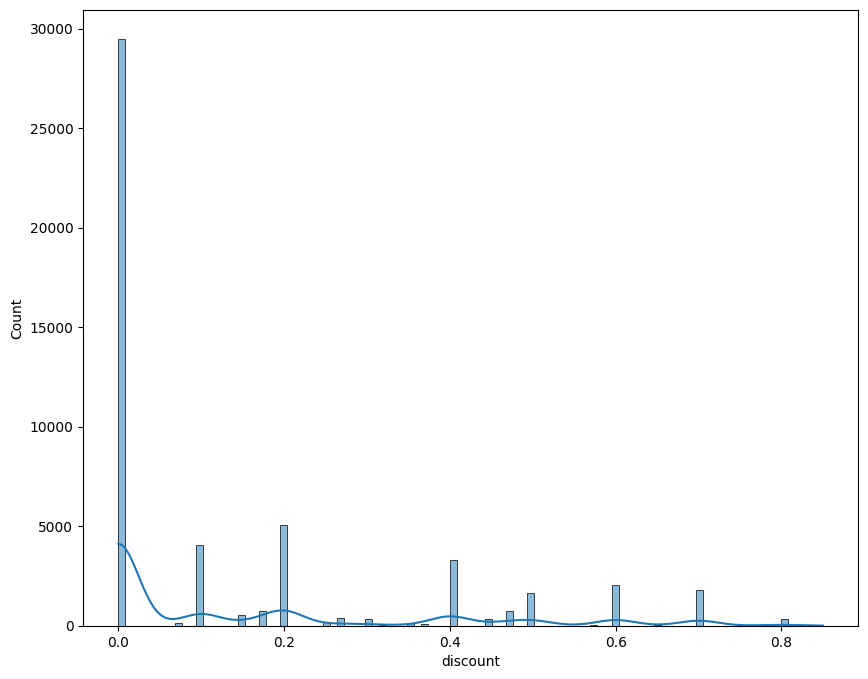

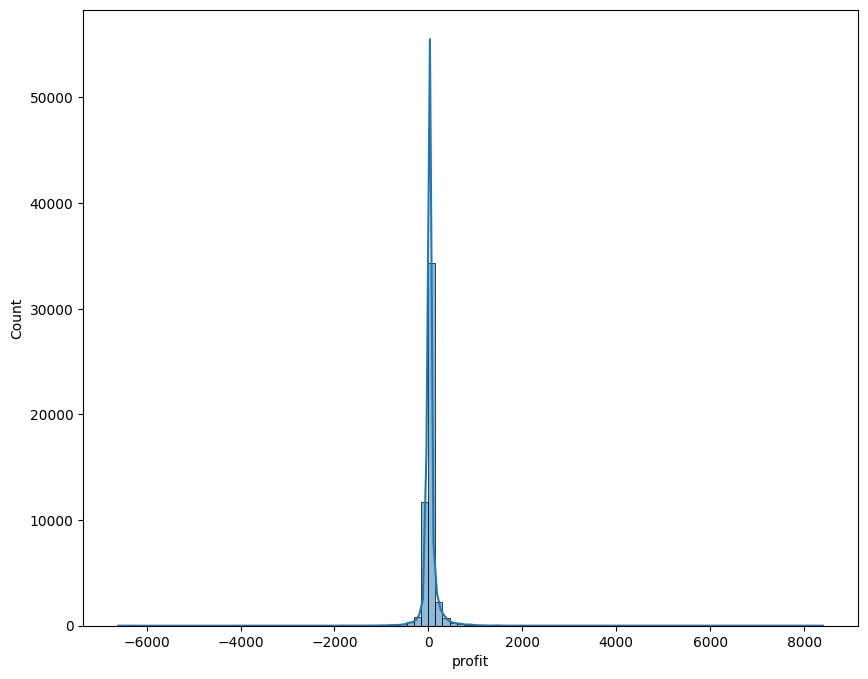

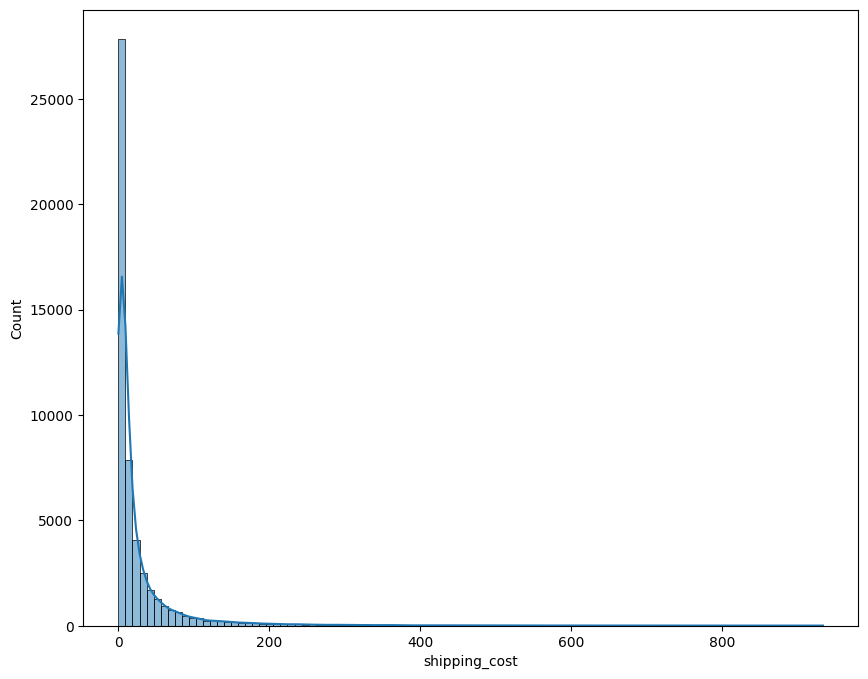

In [ ]:
columnas_float = df.select_dtypes(include='float').columns.tolist()
for i in columnas_float:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[i], bins=100,kde=True)
    plt.show()


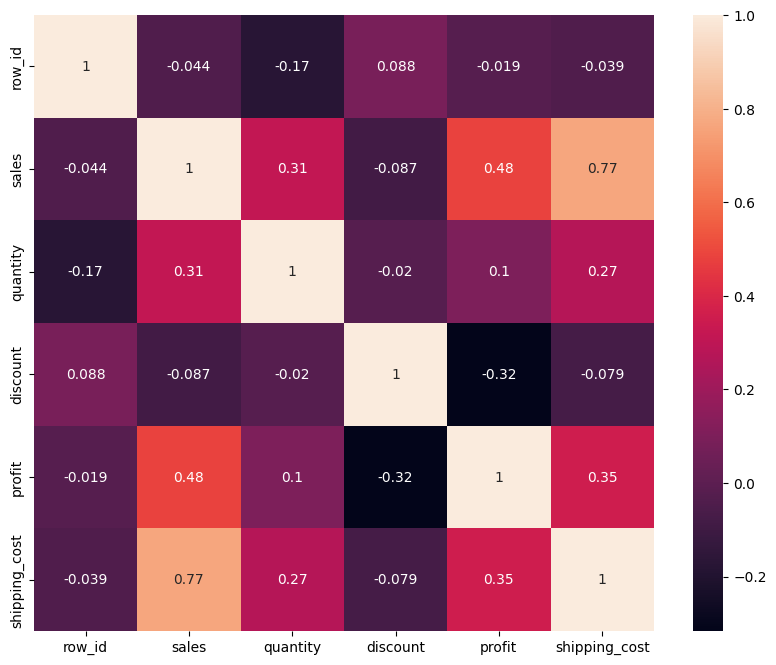

In [ ]:

matrix_corr = df.corr(method="pearson",numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()

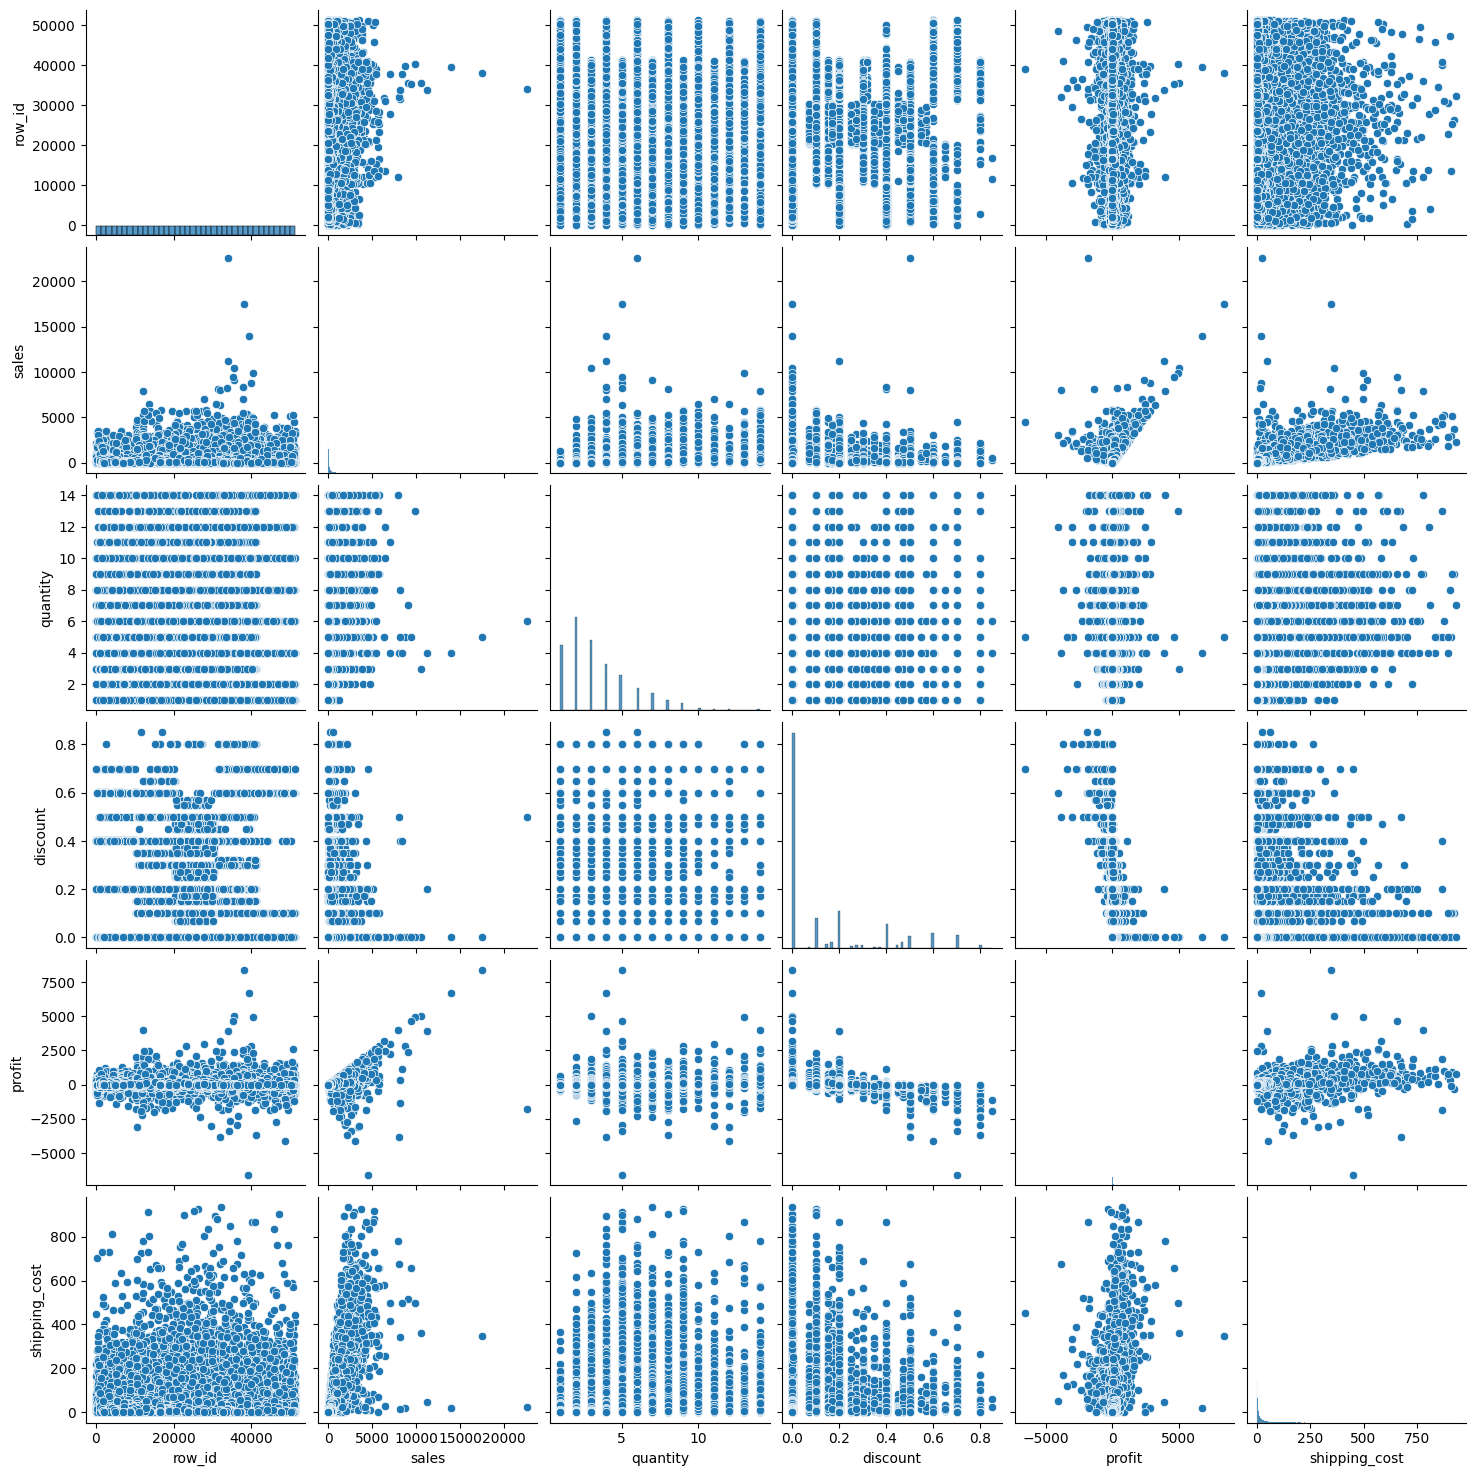

In [ ]:
sns.pairplot(df)

array([[<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'profit'}>],
       [<Axes: title={'center': 'shipping_cost'}>, <Axes: >]],
      dtype=object)

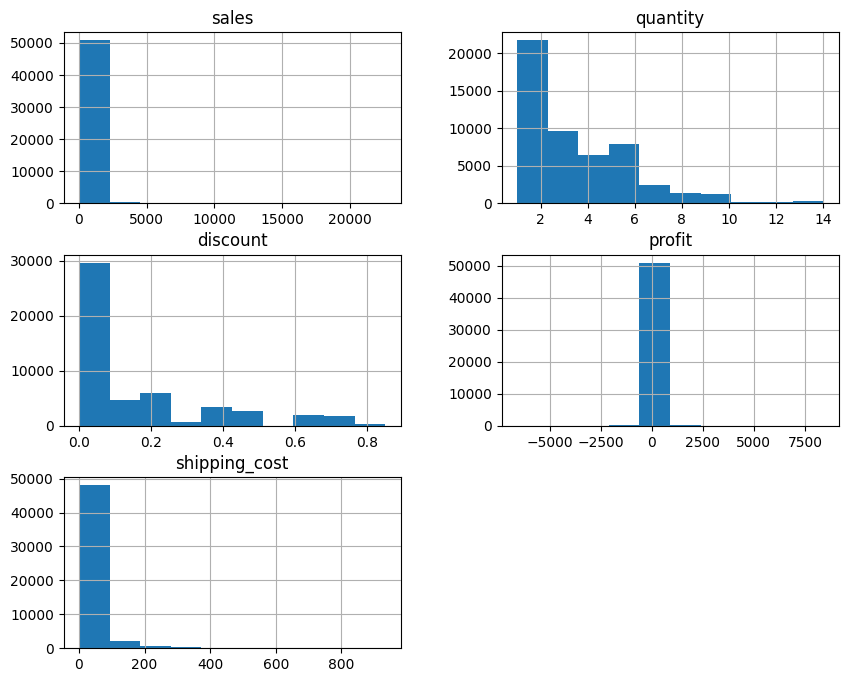

In [ ]:
df[varc].hist(figsize=(10,8))

## Categóricas

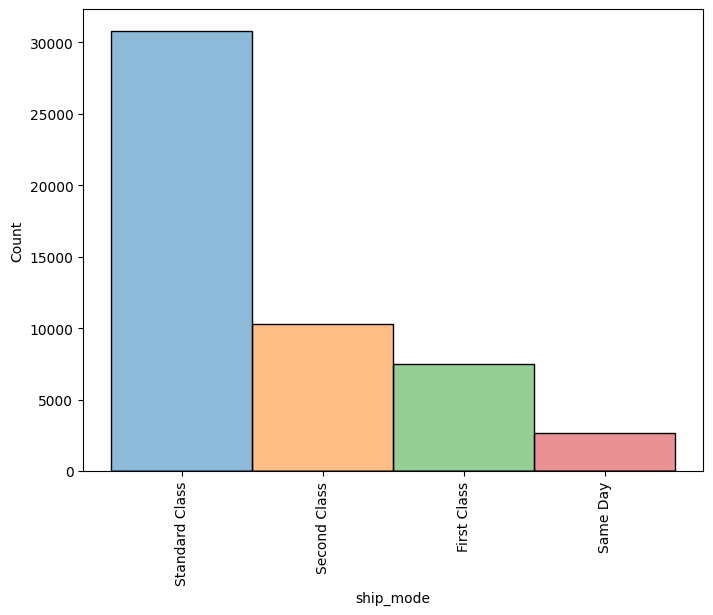

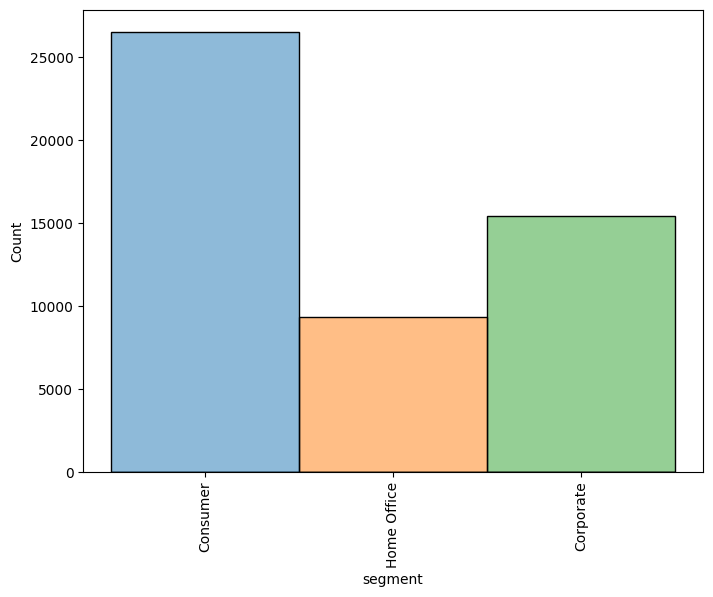

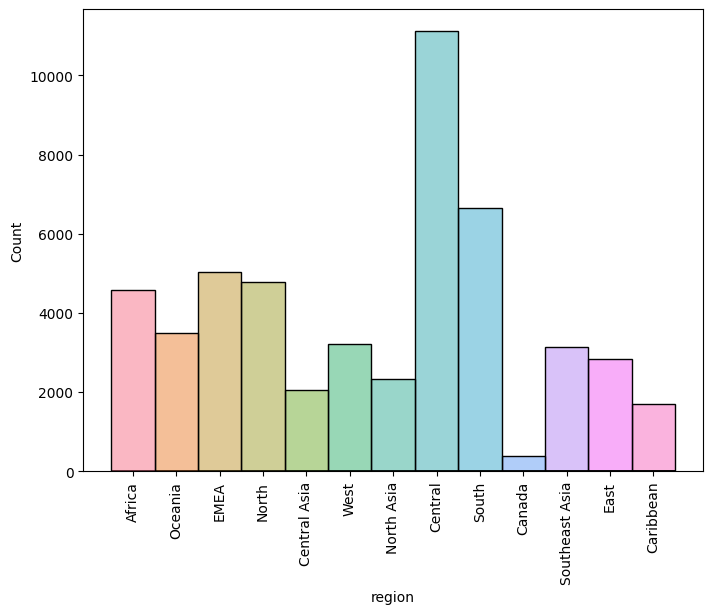

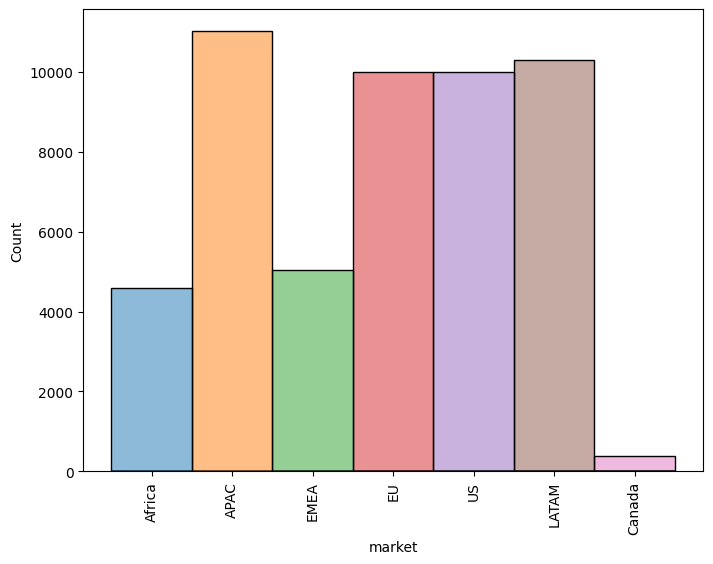

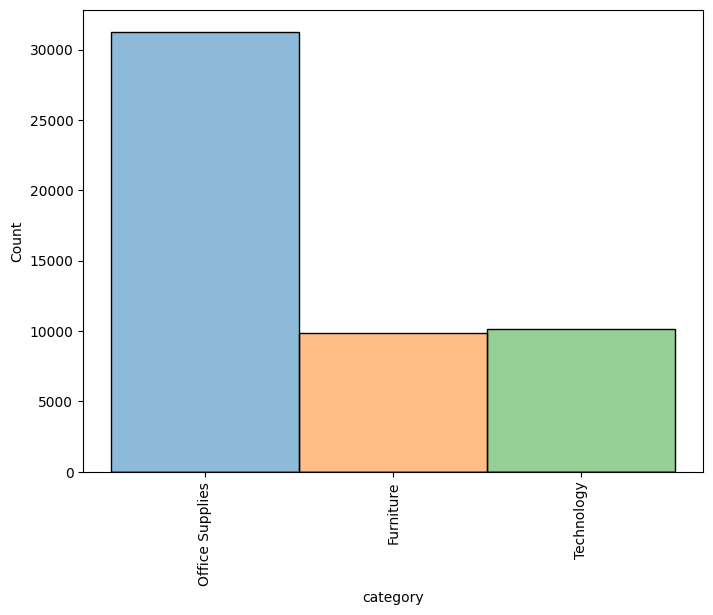

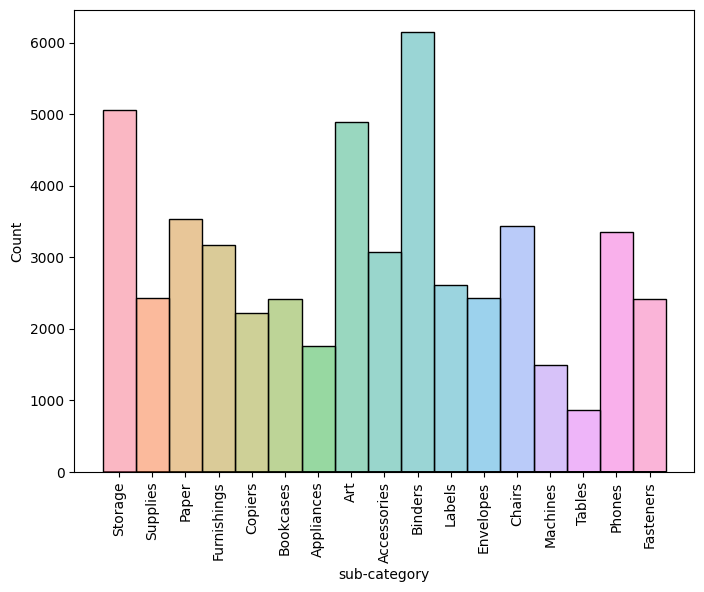

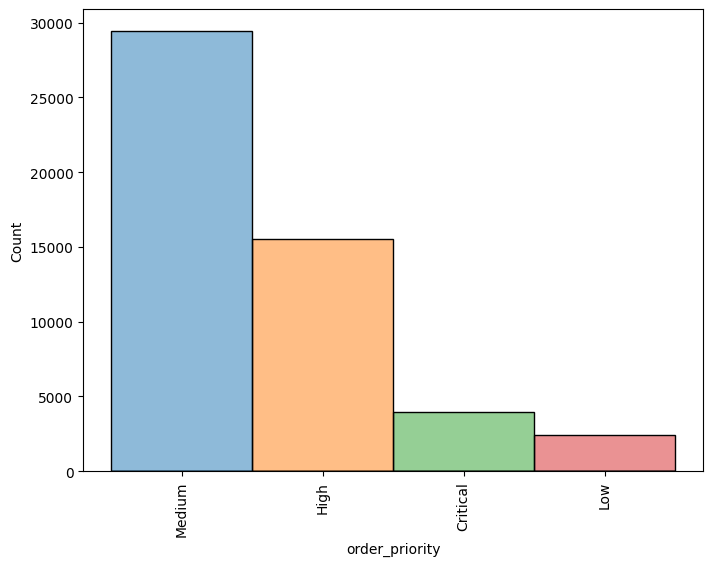

In [ ]:
for i in vard:
    if df[i].value_counts().count() < 20:
        plt.figure(figsize=(8, 6))
        sns.histplot(df, x=i , hue=i, legend=False)
        plt.xticks(rotation = 90)
        # sns.histplot(df[i])
        plt.show()

In [ ]:
for i in vard:
    if df[i].value_counts().count() > 20:
        print(f"Las variables con más de 20 valores son {i}")

Las variables con más de 20 valores son order_id
Las variables con más de 20 valores son customer_id
Las variables con más de 20 valores son customer_name
Las variables con más de 20 valores son country
Las variables con más de 20 valores son city
Las variables con más de 20 valores son state
Las variables con más de 20 valores son product_name


In [ ]:
df.order_id.value_counts()

CA-2014-100111     14
NI-2014-8880       13
TO-2014-9950       13
IN-2012-41261      13
IN-2013-42311      13
                   ..
ID-2014-43494       1
ES-2014-2638373     1
IT-2014-1612191     1
PL-2014-9180        1
CA-2014-156720      1
Name: order_id, Length: 25035, dtype: int64

In [ ]:
df.customer_id.value_counts()

PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
MY-18295    85
            ..
MG-7650      1
MG-7890      1
DK-2985      1
ZC-11910     1
BG-1035      1
Name: customer_id, Length: 1590, dtype: int64

In [ ]:
df.customer_name.value_counts()

Muhammed Yedwab    108
Steven Ward        106
Bill Eplett        102
Gary Hwang         102
Patrick O'Brill    102
                  ... 
Andy Reiter         35
David Bremer        34
Darren Budd         31
Nicole Brennan      31
Michael Oakman      29
Name: customer_name, Length: 795, dtype: int64

In [ ]:
df.country.value_counts()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Eritrea             2
Chad                2
Swaziland           2
South Sudan         2
Bahrain             2
Name: country, Length: 147, dtype: int64

In [ ]:
df.city.value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Melitopol'         1
Terneuzen          1
Athis-Mons         1
Yuyao              1
Deer Park          1
Name: city, Length: 3636, dtype: int64

In [ ]:
df.state.value_counts()

California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
                 ... 
Arad                1
Edirne              1
Kastamonu           1
Gangwon             1
Inhambane           1
Name: state, Length: 1094, dtype: int64

In [ ]:
df.product_name.value_counts()

Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Okidata B401 Printer                                                           1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Xerox WorkCentre 6505DN Laser Multifunction Printer                            1
Barricks Round Table, Rectangular                                              1
Multimedia Mailers                                                             1
Name: product_name, Length: 3788, dtype: int64

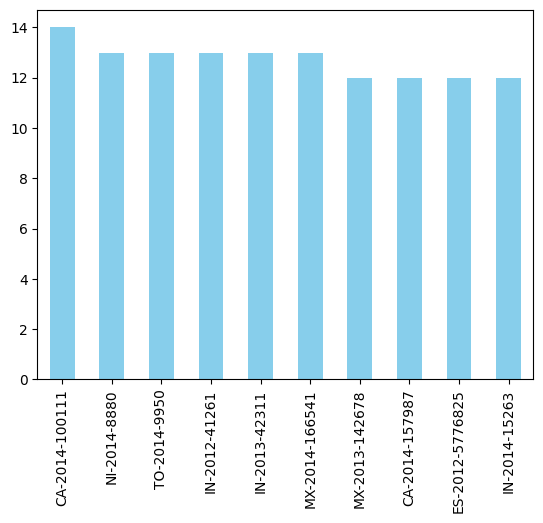

<Figure size 1000x600 with 0 Axes>

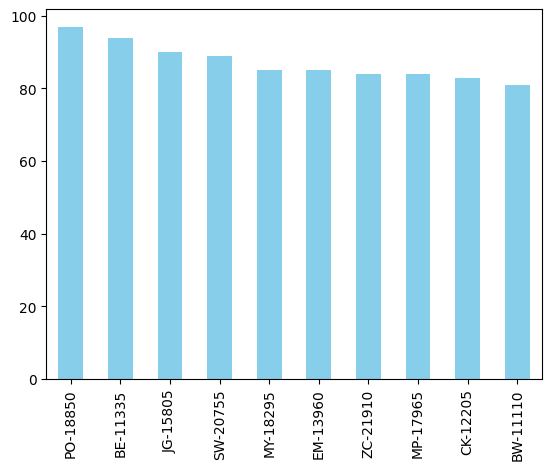

<Figure size 1000x600 with 0 Axes>

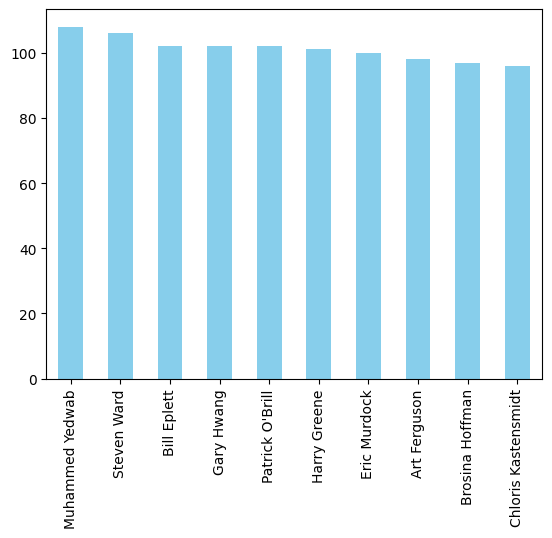

<Figure size 1000x600 with 0 Axes>

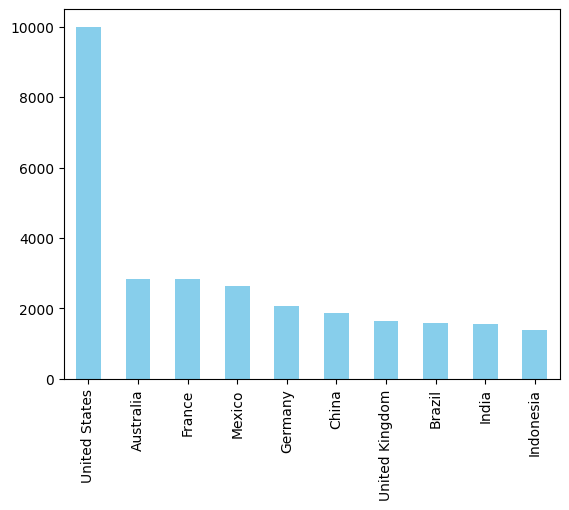

<Figure size 1000x600 with 0 Axes>

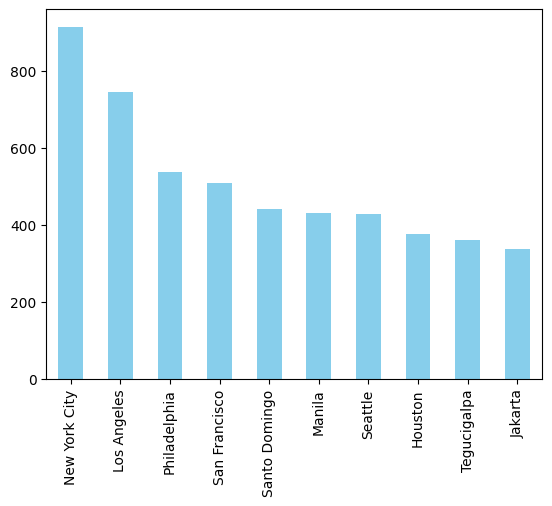

<Figure size 1000x600 with 0 Axes>

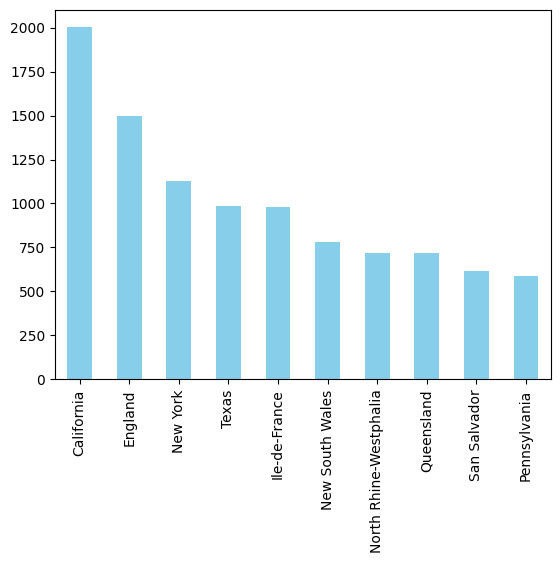

<Figure size 1000x600 with 0 Axes>

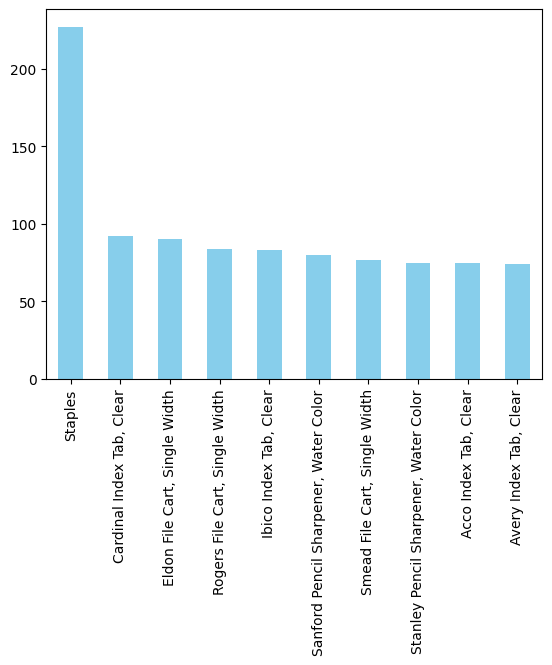

<Figure size 1000x600 with 0 Axes>

In [ ]:
 for i in vard:

    if df[i].value_counts().count() > 20:

        top_10_values = df[i].value_counts().head(10)
        top_10_values.plot(kind='bar', color='skyblue')
        plt.figure(figsize=(10, 6))
        plt.show()

# Gráficas de Tiempo y por Pares

* ¿EXISTEN ALGUNOS CLIENTES QUE SON REGULARES? SI ES ASI, ¿CUALES DE ELLOS GENERAN MAYORES GANANCIAS?
* ¿CUALES SUBCATEGORIAS DE PRODUCTOS SON LOS RESPONSABLES POR LA MAYORIA DE LAS GANANCIAS NEGATIVAS DE LAS VENTAS?
* ¿HAY ALGUNA TENDENCIA CON RESPECTO A COMO SE VENDEN LOS DIFERENTES PRODUCTOS RESPECTO AL TIEMPO?
* ¿HAY ALGUN PATRON CON RESPECTO A COMO LAS DIFERENTES SUB CATEGORIAS DE PRODUCTOS SE VENDEN EN LOS DIFERENTES MERCADOS?

In [ ]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [ ]:
df.head(1)

row_id      order_id order_date ship_date       ship_mode customer_id  \
0   42433  AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   

     customer_name   segment         city        state  country  market  \
0  Toby Braunhardt  Consumer  Constantine  Constantine  Algeria  Africa   

   region        product_id         category sub-category  \
0  Africa  OFF-TEN-10000025  Office Supplies      Storage   

          product_name  sales  quantity  discount  profit  shipping_cost  \
0  Tenex Lockers, Blue  408.3         2       0.0  106.14          35.46   

  order_priority  
0         Medium

In [ ]:
def separar(cadena):
    if '-' in cadena:
        dia, mes, anio = cadena.split("-")
        return "-".join([mes, dia, anio])
    elif '/' in cadena:
        dia, mes, anio = cadena.split("/")
        return "-".join([mes, dia, anio])
    else:
        return cadena

In [ ]:
df['order_date'] = df['order_date'].apply(separar)

In [ ]:
df['order_date'].value_counts()

06-18-2014    135
11-18-2014    127
9-3-2014      126
11-20-2014    118
12-29-2014    116
             ... 
7-7-2013        1
01-16-2011      1
09-23-2012      1
07-21-2013      1
11-10-2013      1
Name: order_date, Length: 1430, dtype: int64

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:

df['ship_date'] = df['ship_date'].apply(separar)

In [ ]:
df['ship_date'] = pd.to_datetime(df['ship_date'])


In [ ]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [ ]:
grouped_df = df.groupby('customer_id')['customer_name'].nunique().reset_index()


In [ ]:
grouped_df

customer_id  customer_name
0       AA-10315              1
1       AA-10375              1
2       AA-10480              1
3       AA-10645              1
4         AA-315              1
...          ...            ...
1585    YS-21880              1
1586    ZC-11910              1
1587    ZC-21910              1
1588    ZD-11925              1
1589    ZD-21925              1

[1590 rows x 2 columns]

In [ ]:
grouped_df['customer_name'].value_counts()

1    1590
Name: customer_name, dtype: int64

In [ ]:
total_sales = df.groupby('customer_name')['sales'].sum().reset_index()

In [ ]:
top_10_customers = total_sales.nlargest(10, 'sales')

In [ ]:
top_10_customers

customer_name        sales
758        Tom Ashbrook  40488.07080
731        Tamara Chand  37457.33300
313           Greg Tran  35550.95428
157  Christopher Conant  35187.07640
687         Sean Miller  35170.93296
73         Bart Watters  32310.44650
558    Natalie Fritzler  31781.25850
290        Fred Hopkins  30400.67452
347           Jane Waco  30288.45030
335        Hunter Lopez  30243.56658

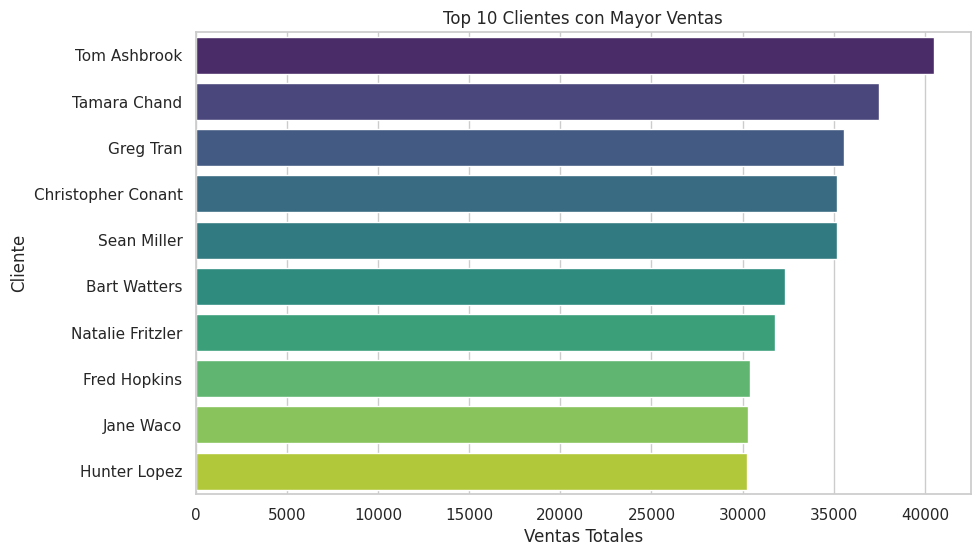

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='customer_name', data=top_10_customers, palette="viridis")
plt.xlabel('Ventas Totales')
plt.ylabel('Cliente')
plt.title('Top 10 Clientes con Mayor Ventas')
plt.show();

In [ ]:
total_profit = df.groupby('customer_name')['profit'].sum().reset_index()

In [ ]:
top_10_customers = total_profit.nlargest(10, 'profit')

In [ ]:
top_10_customers

customer_name      profit
731     Tamara Chand  8672.89890
623     Raymond Buch  8453.04950
672     Sanjit Chand  8205.37990
335     Hunter Lopez  7816.56778
88       Bill Eplett  7410.00530
323      Harry Marie  6958.28640
727     Susan Pistek  6484.40726
542  Mike Gockenbach  6458.67620
6      Adrian Barton  6417.28450
758     Tom Ashbrook  6311.97910

* ¿EXISTEN ALGUNOS CLIENTES QUE SON REGULARES? SI ES ASI, ¿CUALES DE ELLOS GENERAN MAYORES GANANCIAS?|

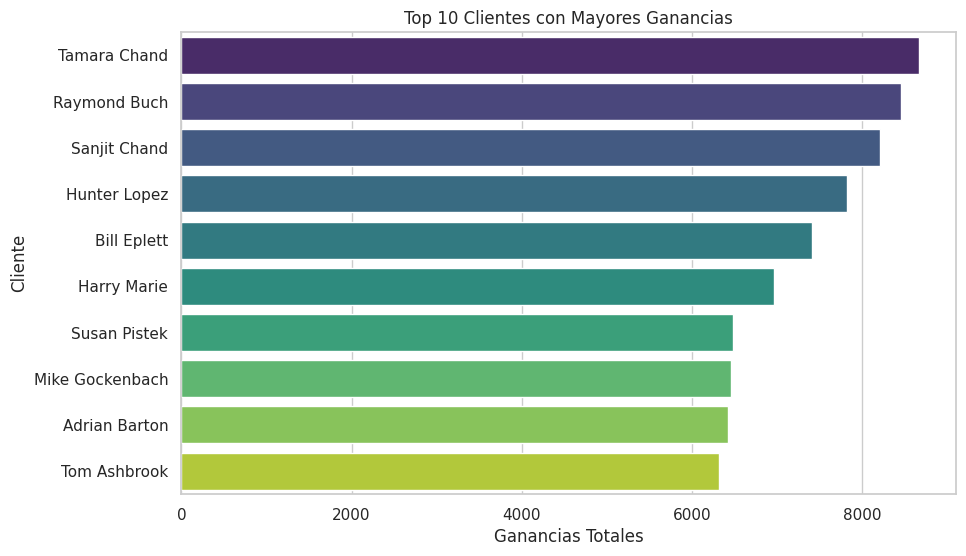

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='customer_name', data=top_10_customers, palette="viridis")
plt.xlabel('Ganancias Totales')
plt.ylabel('Cliente')
plt.title('Top 10 Clientes con Mayores Ganancias')
plt.show();

In [ ]:
total_profit

customer_name      profit
0         Aaron Bergman  4683.20800
1         Aaron Hawkins  2450.92904
2        Aaron Smayling   369.16180
3       Adam Bellavance  4979.97690
4             Adam Hart  1902.03342
..                  ...         ...
790        Xylona Preis  1304.72260
791       Yana Sorensen  3450.40630
792      Yoseph Carroll  4347.17660
793    Zuschuss Carroll   436.93626
794  Zuschuss Donatelli   201.73710

[795 rows x 2 columns]

* ¿CUALES SUBCATEGORIAS DE PRODUCTOS SON LOS RESPONSABLES POR LA MAYORIA DE LAS GANANCIAS NEGATIVAS DE LAS VENTAS?

In [ ]:
varc

['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

In [ ]:
vard

['order_id',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'region',
 'market',
 'category',
 'sub-category',
 'product_name',
 'order_priority']

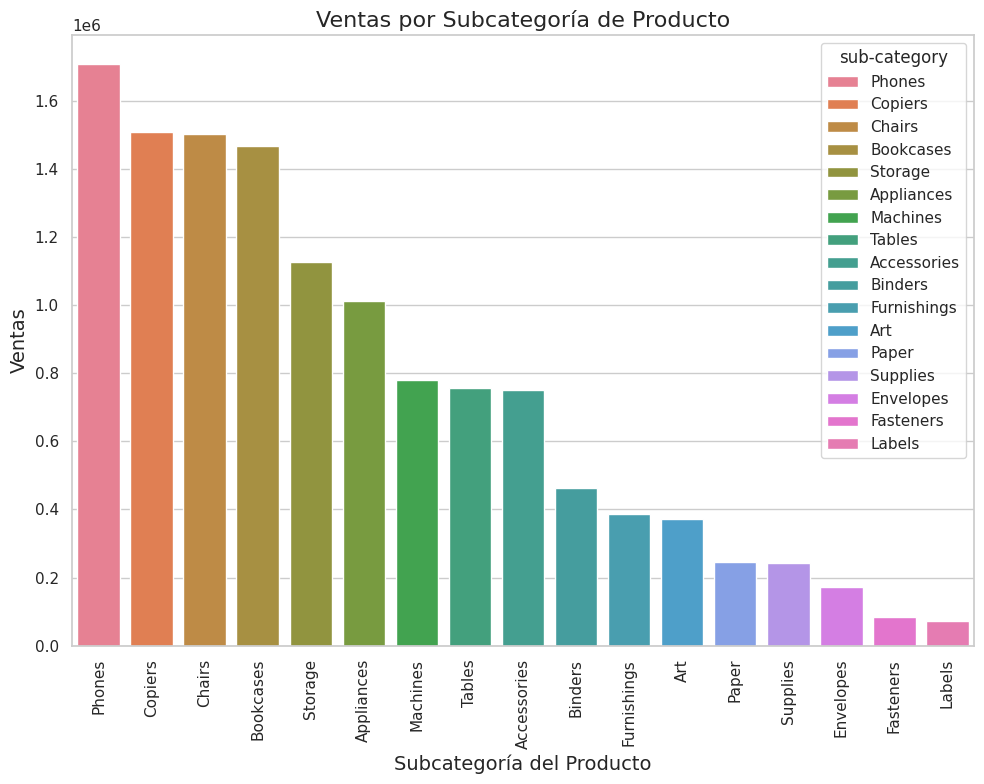

In [ ]:
# Calcular el orden de las subcategorías según la suma de 'sales'
order = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False).index

# Crear un DataFrame ordenado por 'sales'
df_ordered = df.groupby('sub-category')['sales'].sum().loc[order].reset_index()

# Crear el gráfico de barras directamente desde el DataFrame ordenado
plt.figure(figsize=(10, 8))
sns.barplot(data=df_ordered, x='sub-category', y='sales', hue='sub-category', palette="husl", dodge=False)
plt.title('Ventas por Subcategoría de Producto', fontsize=16)
plt.xlabel('Subcategoría del Producto', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Filtrar el DataFrame para obtener solo las filas de las categorías 'Tables' y 'Copiers'
tables_copiers_data = df[df['sub-category'].isin(['Tables', 'Copiers'])]

# Calcular el monto total de ventas para 'Tables'
total_sales_tables = tables_copiers_data[tables_copiers_data['sub-category'] == 'Tables']['sales'].sum()

# Calcular el monto total de ventas para 'Copiers'
total_sales_copiers = tables_copiers_data[tables_copiers_data['sub-category'] == 'Copiers']['sales'].sum()

# Imprimir los resultados
print(f"Monto total de ventas para 'Tables': {total_sales_tables}")
print(f"Monto total de ventas para 'Copiers': {total_sales_copiers}")


Monto total de ventas para 'Tables': 757041.9243999999
Monto total de ventas para 'Copiers': 1509436.2732799998


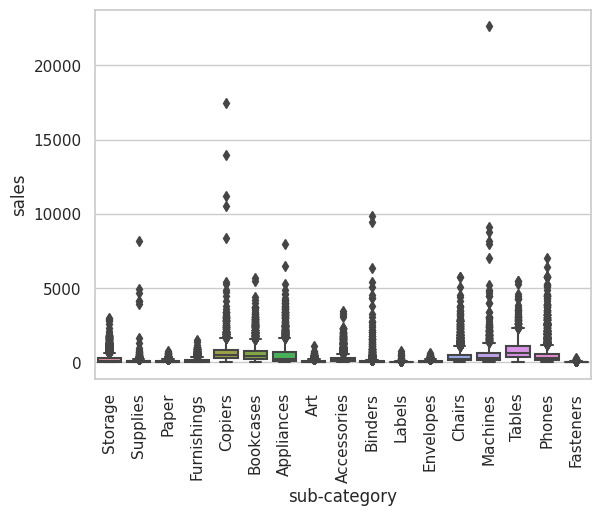

In [ ]:
fig = sns.boxplot(x=df['sub-category'], y = df['sales'])
plt.xticks(rotation=90);

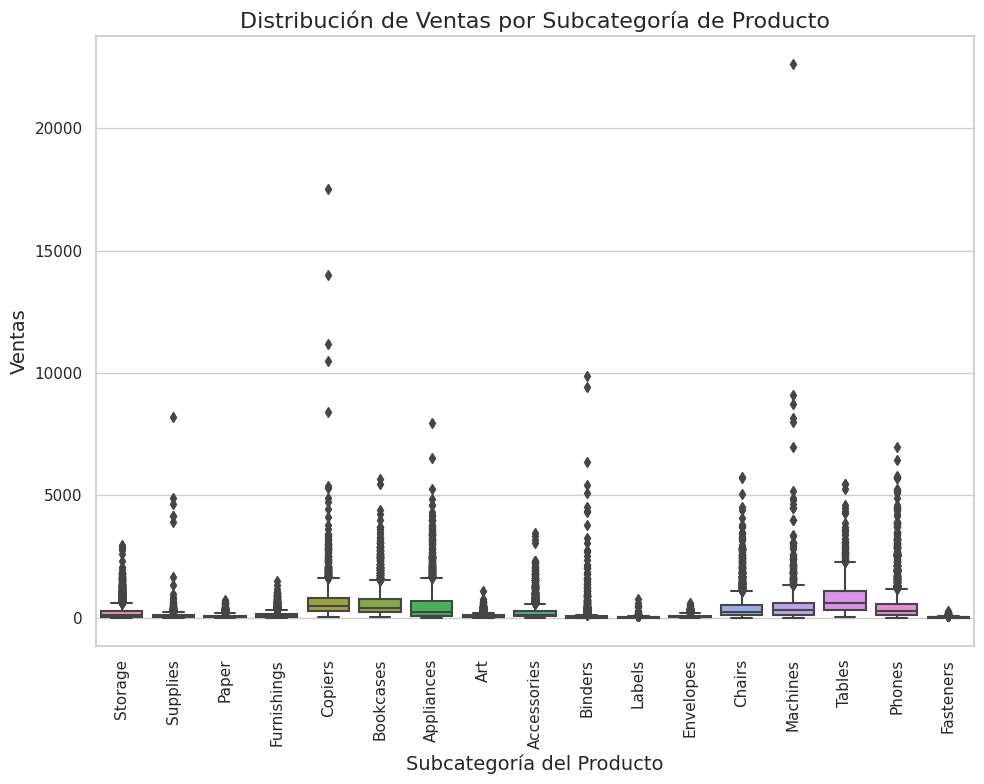

In [ ]:
sns.set(style="whitegrid")

plt.subplots(figsize=(10, 8))
sns.boxplot(x= 'sub-category', y='sales', data=df)
plt.title('Distribución de Ventas por Subcategoría de Producto', fontsize=16)
plt.xlabel('Subcategoría del Producto', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Filtrar el DataFrame para incluir solo filas con 'profit' negativo
negative_profit_table = df[df['profit'] < 0][['sub-category', 'profit']]

# Mostrar la tabla
print(negative_profit_table)


      sub-category    profit
3            Paper  -26.0550
15     Accessories  -19.1360
22         Binders   -0.9840
27          Chairs -172.1172
34          Tables  -43.0296
...            ...       ...
51267          Art   -9.6900
51272      Binders   -6.4200
51274  Accessories  -25.2780
51275  Accessories  -37.2660
51289    Fasteners   -0.6048

[12544 rows x 2 columns]


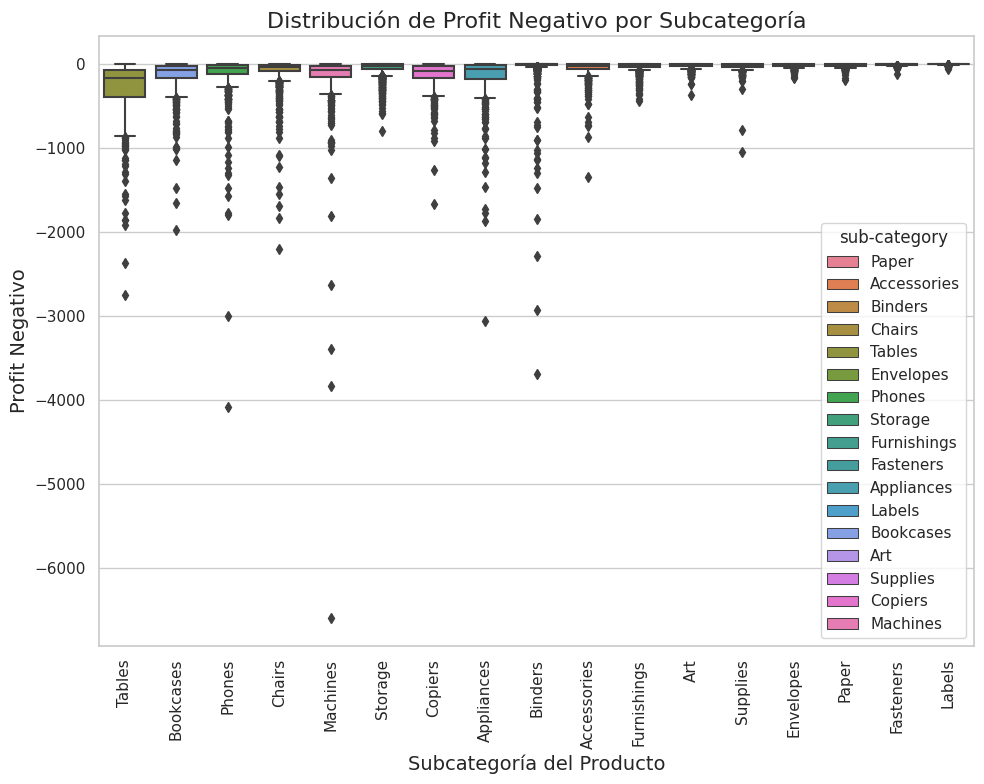

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el orden de las subcategorías según la suma de 'profit' negativo
ordered_subcategories = negative_profit_table.groupby('sub-category')['profit'].sum().sort_values().index

# Crear una paleta de colores
colors = sns.color_palette("husl", n_colors=len(ordered_subcategories))

# Crear el gráfico de boxplot para 'profit' negativo con colores diferentes para cada subcategoría
plt.figure(figsize=(10, 8))
sns.boxplot(x='sub-category', y='profit', data=negative_profit_table, order=ordered_subcategories, palette=colors, hue='sub-category', dodge=False)
plt.title('Distribución de Profit Negativo por Subcategoría', fontsize=16)
plt.xlabel('Subcategoría del Producto', fontsize=14)
plt.ylabel('Profit Negativo', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


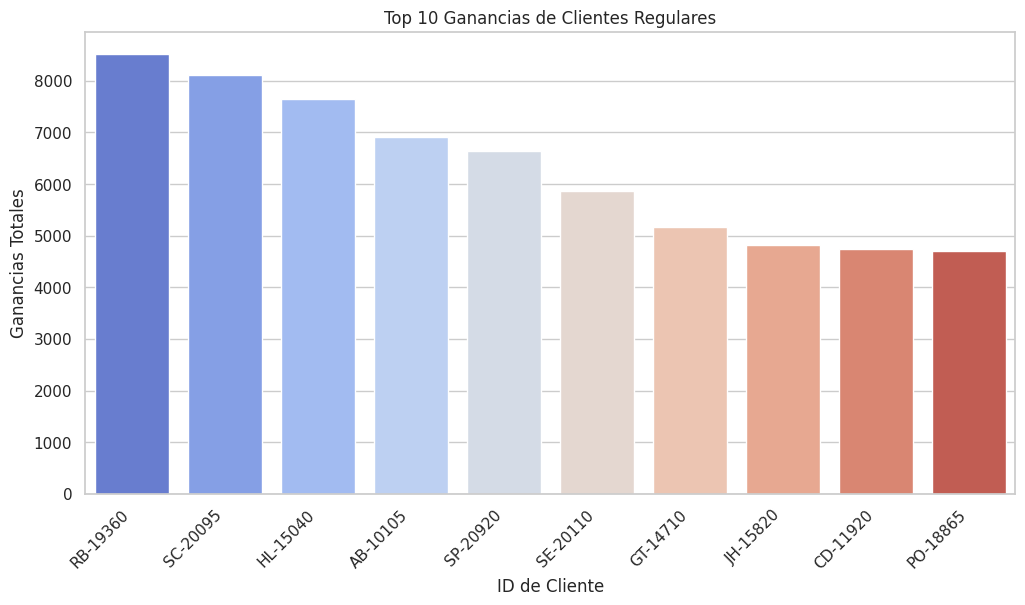

In [ ]:
# Supongamos que ya tienes un DataFrame llamado df con la información de los clientes
# y quieres encontrar los 10 principales clientes regulares basados en alguna métrica (por ejemplo, ganancias totales)

# Primero, realiza algún tipo de análisis para encontrar los 10 principales clientes regulares
# Por ejemplo, aquí asumiré que estás buscando los 10 clientes con las mayores ganancias totales
top_regular_customers = df[df['segment'] == 'Consumer'].groupby('customer_id')['profit'].sum().nlargest(10).index

# Ahora puedes utilizar el bloque de código que proporcionaste anteriormente
colors_customers = sns.color_palette("coolwarm", len(top_regular_customers))
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_id', y='profit', data=df[df['customer_id'].isin(top_regular_customers)], estimator=sum, order=top_regular_customers, palette=colors_customers, errorbar=None)
plt.title('Top 10 Ganancias de Clientes Regulares')
plt.xlabel('ID de Cliente')
plt.ylabel('Ganancias Totales')
plt.xticks(rotation=45, ha='right')
plt.show()



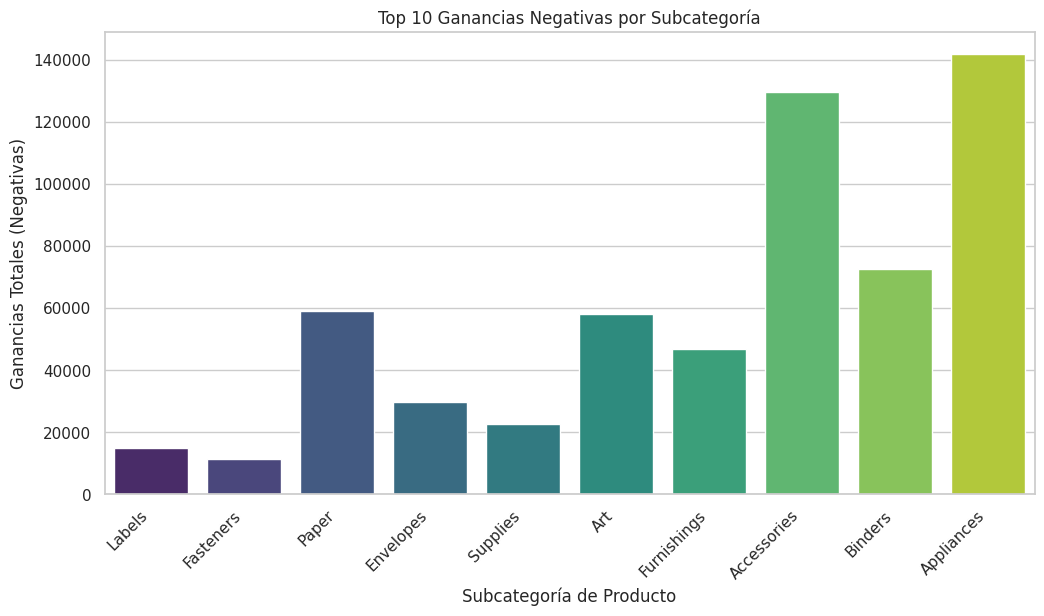

In [ ]:
# Supongamos que ya tienes un DataFrame llamado df con la información de los productos
# y quieres encontrar las 10 subcategorías con las mayores ganancias negativas

# Filtrar las subcategorías con 'profit' negativo
negative_profit_data = df[df['profit'] < 0]

# Encontrar las 10 subcategorías con las mayores ganancias negativas
top_negative_profit_subcategories = negative_profit_data.groupby('sub-category')['profit'].sum().nlargest(10).index

# Filtrar el DataFrame original para obtener los datos específicos de las subcategorías con 'profit' negativo
top_negative_profit_data = df[df['sub-category'].isin(top_negative_profit_subcategories)]

# Ahora puedes utilizar el bloque de código para el gráfico de barras
colors = sns.color_palette("viridis", len(top_negative_profit_subcategories))
plt.figure(figsize=(12, 6))
sns.barplot(x='sub-category', y='profit', data=top_negative_profit_data, estimator=sum, order=top_negative_profit_subcategories, palette=colors, errorbar=None)
plt.title('Top 10 Ganancias Negativas por Subcategoría')
plt.xlabel('Subcategoría de Producto')
plt.ylabel('Ganancias Totales (Negativas)')
plt.xticks(rotation=45, ha='right')
plt.show()


¿HAY ALGUNA TENDENCIA CON RESPECTO A COMO SE VENDEN LOS DIFERENTES PRODUCTOS RESPECTO AL TIEMPO?

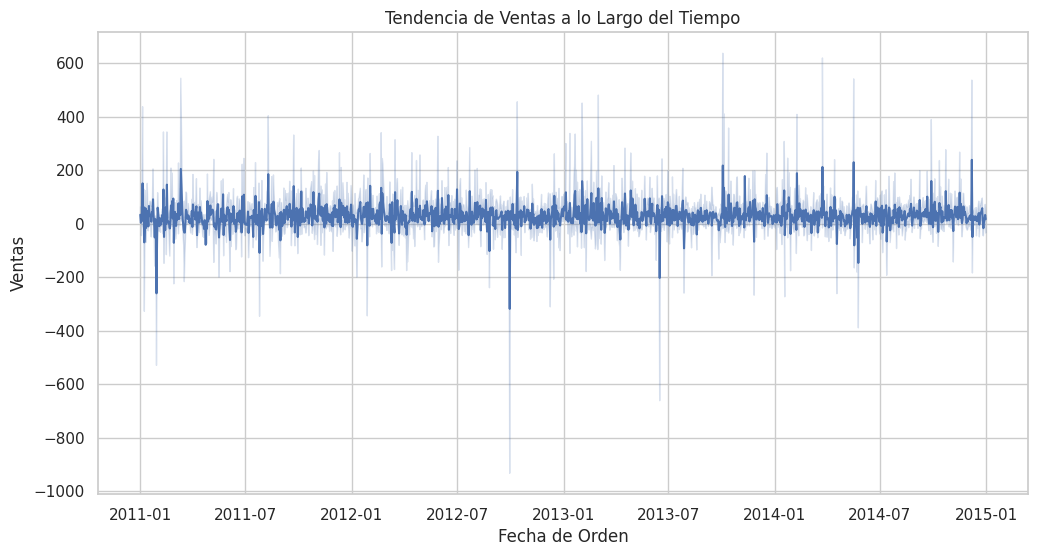

In [ ]:
# Convertir columnas de fecha al tipo datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Gráfico de línea para las ventas a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='profit', data=df)
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha de Orden')
plt.ylabel('Ventas')
plt.show()

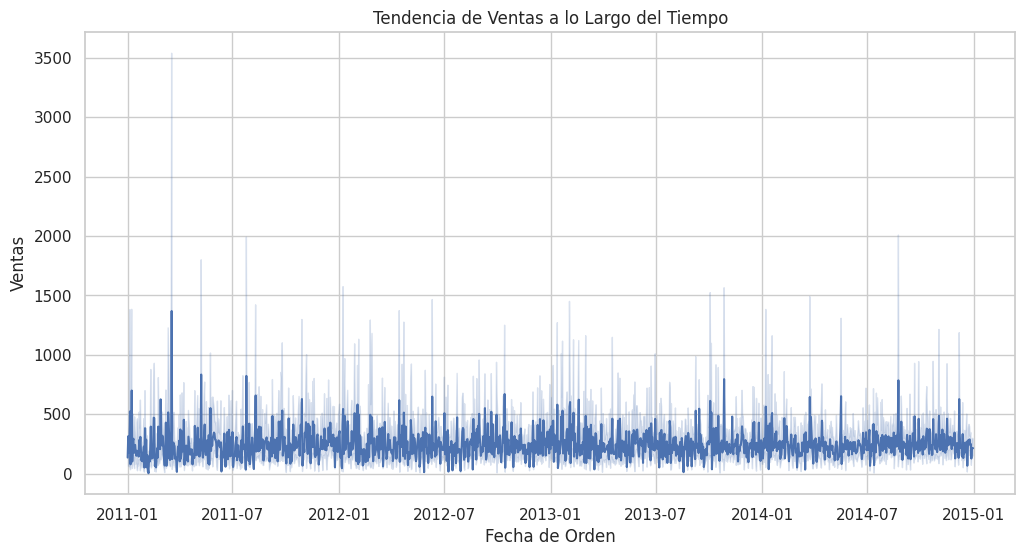

In [ ]:
# Convertir columnas de fecha al tipo datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Gráfico de línea para las ventas a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='sales', data=df)
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha de Orden')
plt.ylabel('Ventas')
plt.show()


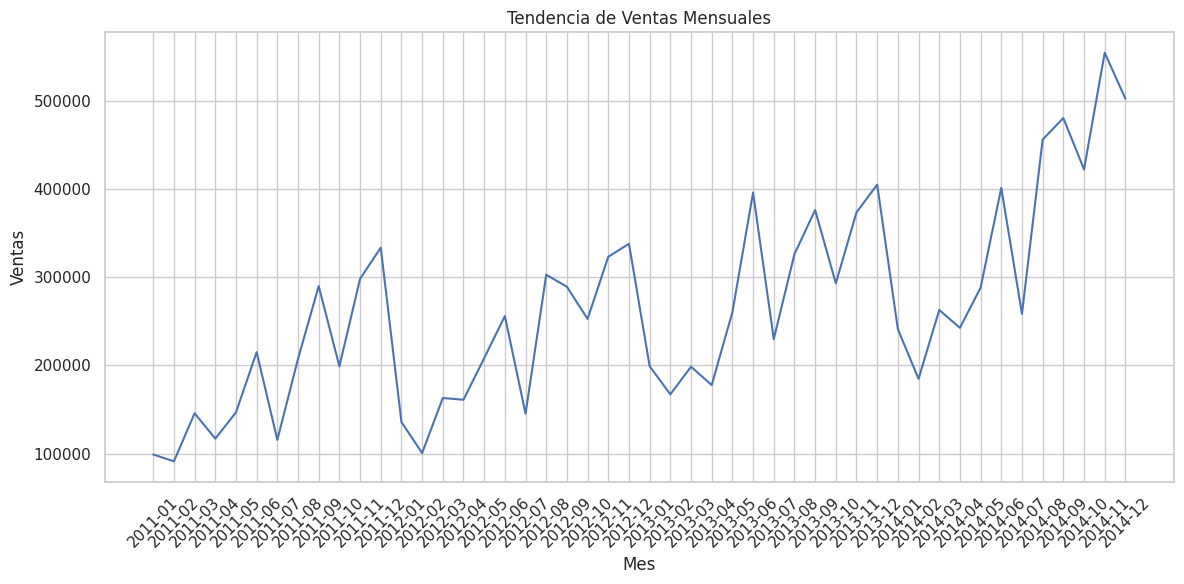

In [ ]:

# Convertir las columnas de fechas a objetos datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['year_month'] = df['order_date'].dt.to_period('M')

# Calcular las ventas mensuales
monthly_sales = df.groupby('year_month')['sales'].sum()

# Crear el gráfico de líneas para visualizar la tendencia de ventas mensuales
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


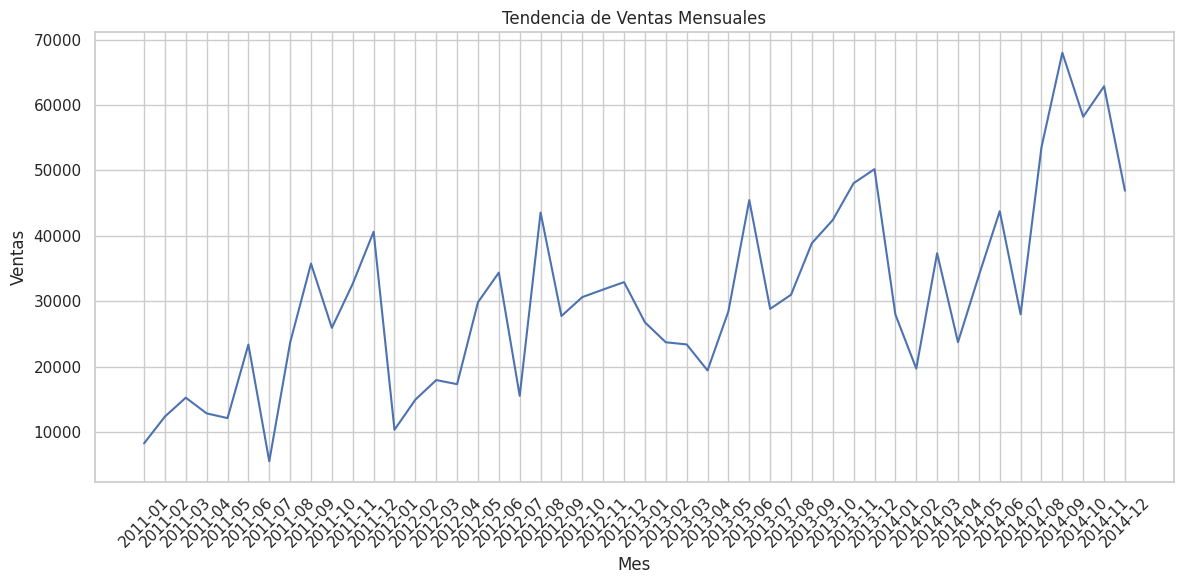

In [ ]:

# Convertir las columnas de fechas a objetos datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['year_month'] = df['order_date'].dt.to_period('M')

# Calcular las ventas mensuales
monthly_sales = df.groupby('year_month')['profit'].sum()

# Crear el gráfico de líneas para visualizar la tendencia de ventas mensuales
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Tendencia de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

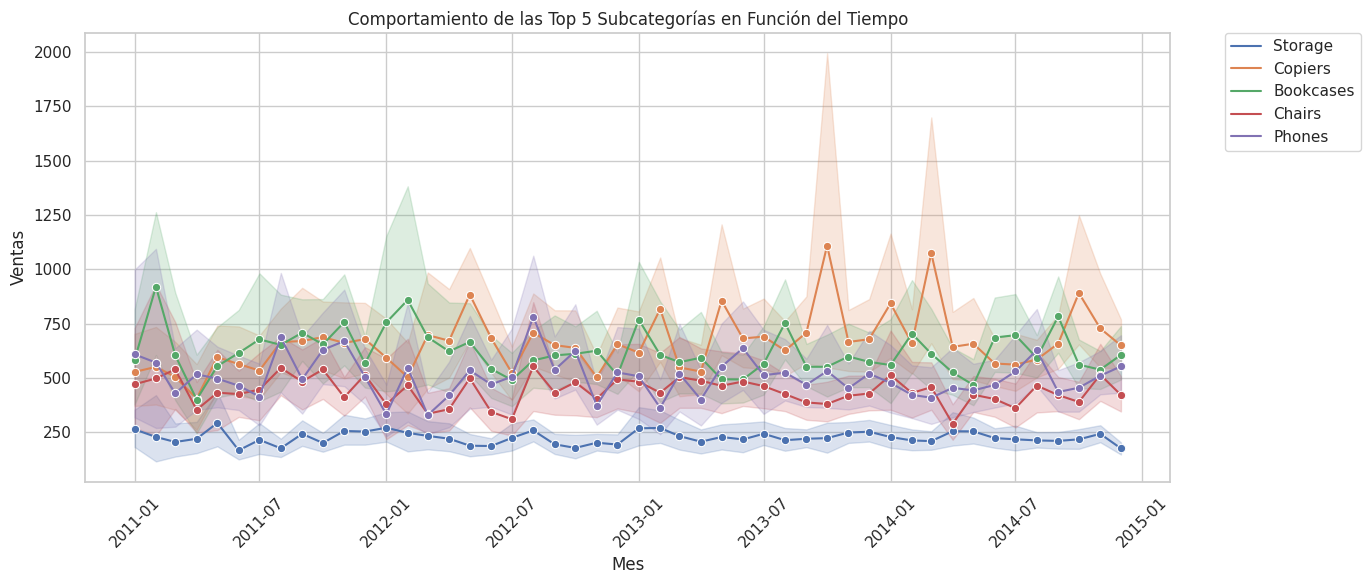

In [ ]:
# Obtener el top 10 de subcategorías por ventas
top_subcategories = df.groupby('sub-category')['sales'].sum().nlargest(5).index

# Filtrar datos de las top 10 subcategorías
top_subcategories_data = df[df['sub-category'].isin(top_subcategories)].copy()

# Convertir 'year_month' a tipo de fecha con marcas de tiempo
top_subcategories_data['year_month'] = pd.to_datetime(top_subcategories_data['year_month'].astype(str))

# Crear el gráfico de líneas para las top 10 subcategorías sin sombra de error
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='sales', hue='sub-category', data=top_subcategories_data, marker='o')
plt.title('Comportamiento de las Top 5 Subcategorías en Función del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


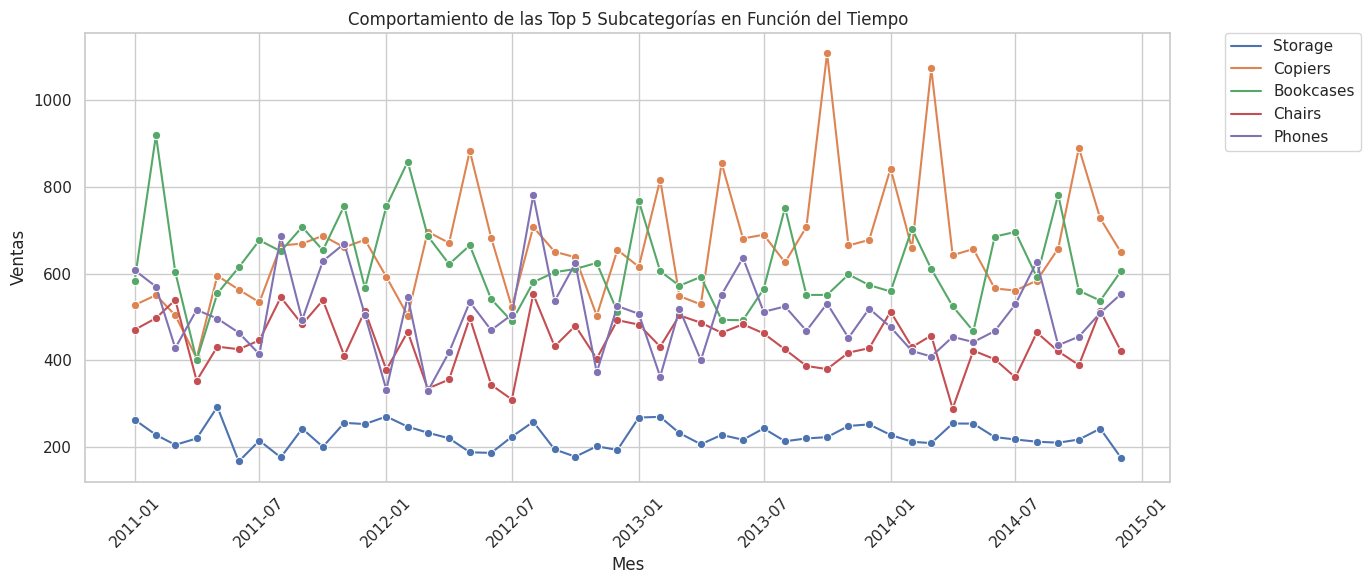

In [ ]:
# Obtener el top 10 de subcategorías por ventas
top_subcategories = df.groupby('sub-category')['sales'].sum().nlargest(5).index

# Filtrar datos de las top 10 subcategorías
top_subcategories_data = df[df['sub-category'].isin(top_subcategories)].copy()

# Convertir 'year_month' a tipo de fecha con marcas de tiempo
top_subcategories_data['year_month'] = pd.to_datetime(top_subcategories_data['year_month'].astype(str))

# Crear el gráfico de líneas para las top 10 subcategorías sin sombra de error
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='sales', hue='sub-category', data=top_subcategories_data, marker='o', errorbar=None)
plt.title('Comportamiento de las Top 5 Subcategorías en Función del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


¿HAY ALGUN PATRON CON RESPECTO A COMO LAS DIFERENTES SUB CATEGORIAS DE PRODUCTOS SE VENDEN EN LOS DIFERENTES MERCADOS?

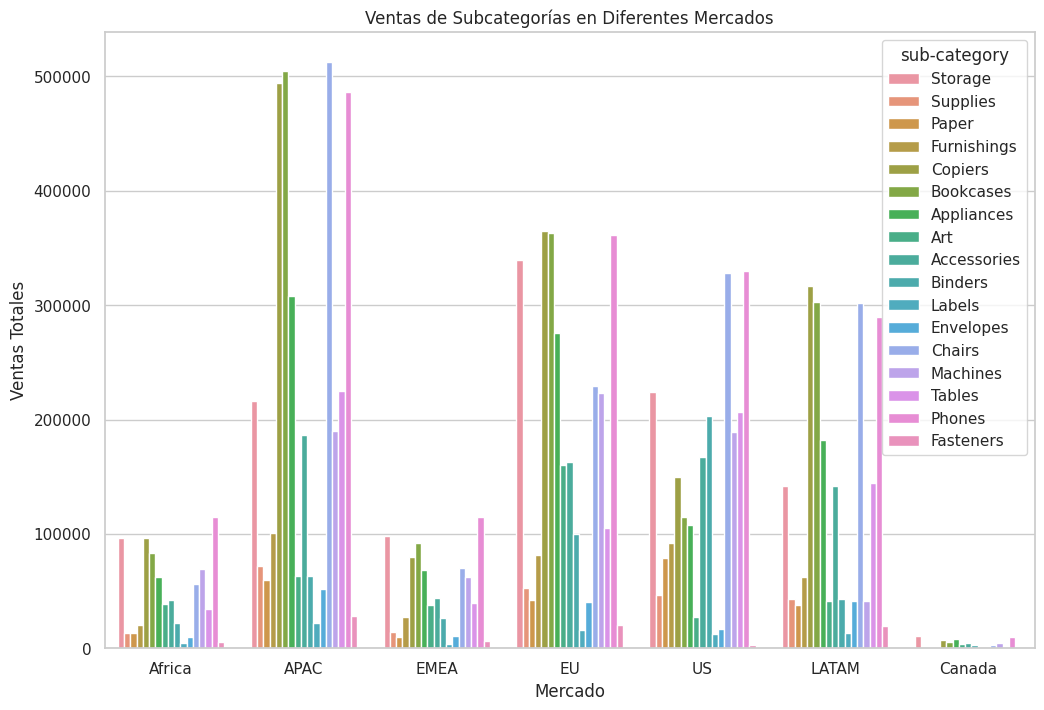

In [ ]:
# Gráfico de barras agrupado por mercado y subcategoría
plt.figure(figsize=(12, 8))
sns.barplot(x='market', y='sales', hue='sub-category', data=df, estimator=sum, errorbar=None)
plt.title('Ventas de Subcategorías en Diferentes Mercados')
plt.xlabel('Mercado')
plt.ylabel('Ventas Totales')
plt.show()


# Limpieza

## DATOS NUMERICOS

## Limpieza de Valores Extremos

In [ ]:
## CERCA INTERCUARTIL
k = 1.5
ext = df[varc].describe(percentiles=[0.25,0.75]).T[['25%','75%','mean']].reset_index()
ext['IQR'] = ext['75%'] - ext['25%']
ext['li']  = ext['mean'] - k*ext['IQR']
ext['ls']  = ext['mean'] + k*ext['IQR']
ext = ext[['index','li','ls']]
for v, li, ls in ext.values:
    df[f'ol_{v}'] = ((df[v]<li) | (df[v]>ls)  ).astype(int)

df['ext_iqr'] = df.filter(like='ol').max(axis=1)
df.drop(df.filter(like='ol_').columns, axis=1, inplace=True)

df['ext_iqr'].value_counts()

df = df.loc[df['ext_iqr'] == 0].reset_index(drop=True).drop(['ext_iqr'],axis=1)

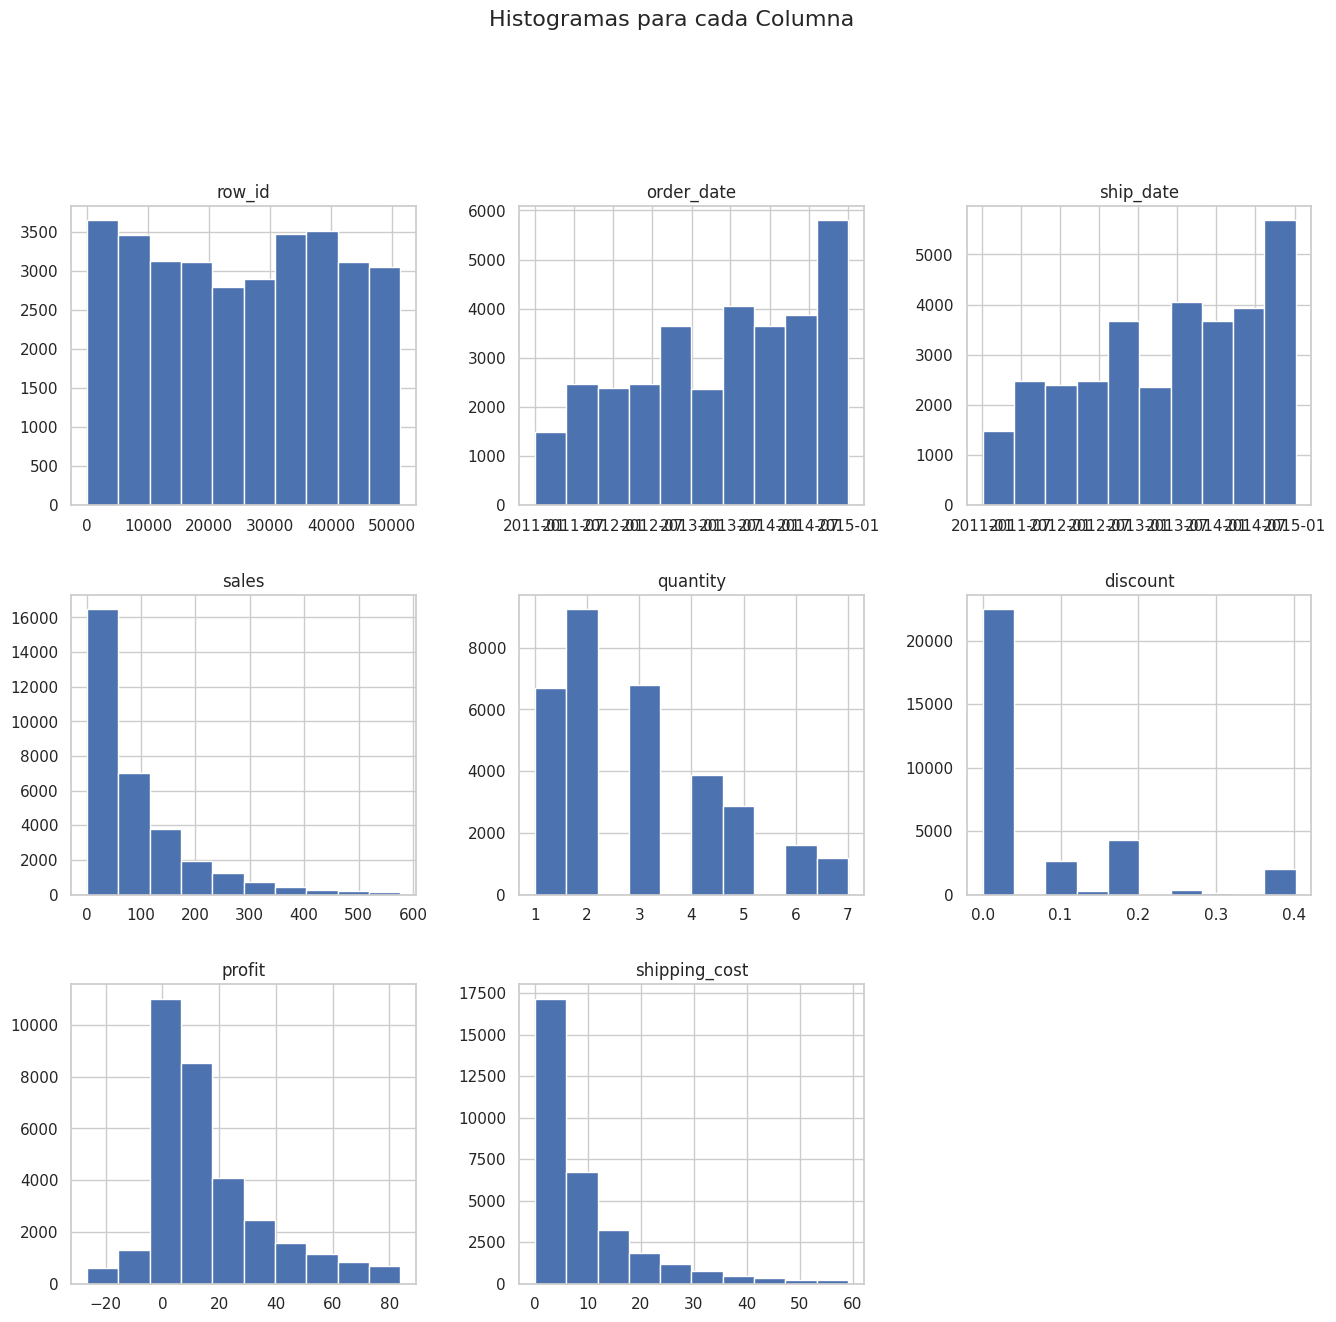

In [ ]:
df.hist(figsize=(16, 14))
plt.suptitle('Histogramas para cada Columna', x=0.5, y=1.02, fontsize=16)
plt.show()

## Discretas

In [ ]:
vard

['order_id',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'region',
 'market',
 'category',
 'sub-category',
 'product_name',
 'order_priority']

In [ ]:
df.columns.tolist()

['row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'city',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub-category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority',
 'year_month']

In [ ]:
def freq(df,var):
    if type(var) != list:
        var = [var]
    for v in var:
        aux = df[v].value_counts().to_frame().rename(columns={v:'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply( np.cumsum )
        print(f"Tabla de frecuencias para la variable {v} \n")
        print(aux,"\n")

In [ ]:
freq(df,vard)

Tabla de frecuencias para la variable order_id 

                FA        FR    FAA       FRA
TO-2014-9950    12  0.000372     12  0.000372
MX-2013-142678  11  0.000341     23  0.000714
MX-2013-159100  10  0.000310     33  0.001024
MX-2011-100587  10  0.000310     43  0.001334
IN-2013-42311   10  0.000310     53  0.001645
...             ..       ...    ...       ...
IN-2013-57361    1  0.000031  32224  0.999876
IN-2013-22102    1  0.000031  32225  0.999907
IN-2013-23908    1  0.000031  32226  0.999938
IN-2013-71333    1  0.000031  32227  0.999969
CA-2014-156720   1  0.000031  32228  1.000000

[18694 rows x 4 columns] 

Tabla de frecuencias para la variable ship_mode 

                   FA        FR    FAA       FRA
Standard Class  19594  0.607981  19594  0.607981
Second Class     6485  0.201223  26079  0.809203
First Class      4510  0.139940  30589  0.949144
Same Day         1639  0.050856  32228  1.000000 

Tabla de frecuencias para la variable customer_id 

          FA        FR

## Normalizacion

In [ ]:
def normalizar(df, v, umbral):

    aux = df[v].value_counts(True).to_frame()
    aux[f'n_{v}'] = np.where( aux[v] < umbral , 'SMALL_CATEGORIES', aux.index   )
    moda = aux.head(1)[f'n_{v}'].values[0]
    if aux.loc[aux[f'n_{v}'] == 'SMALL_CATEGORIES'][v].sum() < umbral:
        aux[f'n_{v}'].replace({'SMALL_CATEGORIES':moda},inplace=True)

    aux.drop(v,axis=1, inplace=True)
    aux.reset_index(inplace=True)

    return df.merge(aux, left_on=[v], right_on='index',how='inner').drop('index',axis=1)

In [ ]:
for v in vard:
    df = normalizar(df,v, 0.05)

In [ ]:
varn = df.filter(like='n_').columns.tolist()
varn

['n_order_id',
 'n_ship_mode',
 'n_customer_id',
 'n_customer_name',
 'n_segment',
 'n_country',
 'n_city',
 'n_state',
 'n_region',
 'n_market',
 'n_category',
 'n_sub-category',
 'n_product_name',
 'n_order_priority']

In [ ]:
freq(df,varn)

Tabla de frecuencias para la variable n_order_id 

                     FA   FR    FAA  FRA
SMALL_CATEGORIES  32228  1.0  32228  1.0 

Tabla de frecuencias para la variable n_ship_mode 

                   FA        FR    FAA       FRA
Standard Class  19594  0.607981  19594  0.607981
Second Class     6485  0.201223  26079  0.809203
First Class      4510  0.139940  30589  0.949144
Same Day         1639  0.050856  32228  1.000000 

Tabla de frecuencias para la variable n_customer_id 

                     FA   FR    FAA  FRA
SMALL_CATEGORIES  32228  1.0  32228  1.0 

Tabla de frecuencias para la variable n_customer_name 

                     FA   FR    FAA  FRA
SMALL_CATEGORIES  32228  1.0  32228  1.0 

Tabla de frecuencias para la variable n_segment 

                FA        FR    FAA       FRA
Consumer     16699  0.518152  16699  0.518152
Corporate     9676  0.300236  26375  0.818388
Home Office   5853  0.181612  32228  1.000000 

Tabla de frecuencias para la variable n_country 

  

### Unarias

In [ ]:
unarias = [ v for v, conteo in zip(varn,[df[v].unique().shape[0]  for v in varn ] ) if conteo == 1   ]

In [ ]:
varn = [v for v in varn if v not in unarias]

In [ ]:
varn

['n_ship_mode',
 'n_segment',
 'n_country',
 'n_region',
 'n_market',
 'n_category',
 'n_sub-category',
 'n_order_priority']

In [ ]:
df.head(1)

row_id       order_id order_date  ship_date       ship_mode customer_id  \
0   22253  IN-2011-47883 2011-01-01 2011-01-08  Standard Class    JH-15985   

  customer_name   segment         city            state    country market  \
0   Joseph Holt  Consumer  Wagga Wagga  New South Wales  Australia   APAC   

    region       product_id         category sub-category  \
0  Oceania  OFF-SU-10000618  Office Supplies     Supplies   

               product_name    sales  quantity  discount  profit  \
0  Acme Trimmer, High Speed  120.366         3       0.1  36.036   

   shipping_cost order_priority year_month        n_order_id     n_ship_mode  \
0           9.72         Medium    2011-01  SMALL_CATEGORIES  Standard Class   

      n_customer_id   n_customer_name n_segment  n_country            n_city  \
0  SMALL_CATEGORIES  SMALL_CATEGORIES  Consumer  Australia  SMALL_CATEGORIES   

            n_state n_region n_market       n_category n_sub-category  \
0  SMALL_CATEGORIES  Oceania     APAC  Office Supplies       Supplies   

     n_product_name n_order_priority  
0  SMALL_CATEGORIES           Medium

In [ ]:
fechas = ['order_date', 'ship_date']

In [ ]:
varc

['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

In [ ]:
# Seleccionar las columnas deseadas del DataFrame original
selected_columns = varn + varc + fechas
df = df[selected_columns].copy()


In [ ]:
df

n_ship_mode    n_segment         n_country          n_region  \
0      Standard Class     Consumer         Australia           Oceania   
1      Standard Class  Home Office  SMALL_CATEGORIES             South   
2      Standard Class  Home Office  SMALL_CATEGORIES           Central   
3        Second Class  Home Office  SMALL_CATEGORIES  SMALL_CATEGORIES   
4      Standard Class     Consumer  SMALL_CATEGORIES            Africa   
...               ...          ...               ...               ...   
32223    Second Class    Corporate            France           Central   
32224        Same Day     Consumer            France           Central   
32225    Second Class    Corporate            France           Central   
32226     First Class     Consumer  SMALL_CATEGORIES              EMEA   
32227    Second Class    Corporate  SMALL_CATEGORIES            Africa   

      n_market       n_category    n_sub-category n_order_priority     sales  \
0         APAC  Office Supplies          Supplies           Medium  120.3660   
1           EU  Office Supplies          Supplies           Medium  178.3200   
2        LATAM  Office Supplies          Supplies           Medium   17.8320   
3        LATAM  Office Supplies          Supplies           Medium  118.8800   
4       Africa  Office Supplies          Supplies           Medium   44.5800   
...        ...              ...               ...              ...       ...   
32223       EU       Technology  SMALL_CATEGORIES         Critical  103.1220   
32224       EU       Technology  SMALL_CATEGORIES         Critical  299.1150   
32225       EU       Technology  SMALL_CATEGORIES         Critical  226.5165   
32226     EMEA       Technology  SMALL_CATEGORIES         Critical   86.9700   
32227   Africa       Technology  SMALL_CATEGORIES         Critical  312.5100   

       quantity  discount   profit  shipping_cost order_date  ship_date  
0             3      0.10  36.0360           9.72 2011-01-01 2011-01-08  
1             4      0.00  51.6000          16.62 2013-02-08 2013-02-13  
2             1      0.40  -8.6280           1.40 2012-06-11 2012-06-16  
3             4      0.00  13.0400          17.30 2014-03-17 2014-03-22  
4             1      0.00  12.9000           4.58 2011-11-23 2011-11-29  
...         ...       ...      ...            ...        ...        ...  
32223         1      0.15 -10.9380          22.40 2013-07-09 2013-07-11  
32224         2      0.15 -24.6450          42.12 2013-06-28 2013-06-28  
32225         1      0.15  26.6265          29.61 2011-11-04 2011-11-06  
32226         1      0.00  19.1100          13.38 2012-08-06 2012-08-07  
32227         1      0.00   3.1200          51.13 2014-10-15 2014-10-18  

[32228 rows x 15 columns]

In [ ]:
df.shape

(32228, 15)

In [ ]:
df.columns

Index(['n_ship_mode', 'n_segment', 'n_country', 'n_region', 'n_market',
       'n_category', 'n_sub-category', 'n_order_priority', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_date', 'ship_date'],
      dtype='object')

In [ ]:
for v in df.columns.tolist():
  print(v,df[v].map(type).unique())

n_ship_mode [<class 'str'>]
n_segment [<class 'str'>]
n_country [<class 'str'>]
n_region [<class 'str'>]
n_market [<class 'str'>]
n_category [<class 'str'>]
n_sub-category [<class 'str'>]
n_order_priority [<class 'str'>]
sales [<class 'float'>]
quantity [<class 'int'>]
discount [<class 'float'>]
profit [<class 'float'>]
shipping_cost [<class 'float'>]
order_date [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
ship_date [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


In [ ]:
df.head(3)

n_ship_mode    n_segment         n_country n_region n_market  \
0  Standard Class     Consumer         Australia  Oceania     APAC   
1  Standard Class  Home Office  SMALL_CATEGORIES    South       EU   
2  Standard Class  Home Office  SMALL_CATEGORIES  Central    LATAM   

        n_category n_sub-category n_order_priority    sales  quantity  \
0  Office Supplies       Supplies           Medium  120.366         3   
1  Office Supplies       Supplies           Medium  178.320         4   
2  Office Supplies       Supplies           Medium   17.832         1   

   discount  profit  shipping_cost order_date  ship_date  
0       0.1  36.036           9.72 2011-01-01 2011-01-08  
1       0.0  51.600          16.62 2013-02-08 2013-02-13  
2       0.4  -8.628           1.40 2012-06-11 2012-06-16

In [ ]:
df = df.sort_values(by='order_date')


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['profit', 'order_date', 'ship_date'], axis=1)
y = df['profit']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Aplicar StandardScaler a las variables numéricas
scaler = StandardScaler()
numeric_cols = ['sales', 'quantity', 'discount', 'shipping_cost']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Aplicar LabelEncoder a las variables categóricas
label_encoder = LabelEncoder()
categorical_cols = ['n_ship_mode', 'n_segment', 'n_country', 'n_region', 'n_market', 'n_category', 'n_sub-category', 'n_order_priority']
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])




In [ ]:
X_train

n_ship_mode  n_segment  n_country  n_region  n_market  n_category  \
0                3          0          0         5         0           1   
13106            3          0          0         5         0           0   
25028            2          0          3         2         2           1   
1175             3          0          0         5         0           1   
18778            3          0          3         6         4           2   
...            ...        ...        ...       ...       ...         ...   
21191            3          0          3         4         3           1   
13142            3          2          0         5         0           0   
25722            2          0          3         6         0           0   
12806            3          0          4         3         5           1   
19736            2          0          3         6         0           1   

       n_sub-category  n_order_priority     sales  quantity  discount  \
0                  11                 2  0.283857  0.067654  0.314057   
13106               6                 2  0.214671  1.307358  0.314057   
25028              10                 1 -0.276636  0.687506 -0.564922   
1175                8                 2 -0.389032 -0.552197  0.314057   
18778               9                 2  2.286842 -1.172049 -0.564922   
...               ...               ...       ...       ...       ...   
21191               2                 1 -0.783132  0.067654 -0.564922   
13142               6                 2 -0.079369  0.067654  0.314057   
25722               6                 1 -0.083213 -0.552197 -0.564922   
12806              10                 2  1.061621  0.687506 -0.564922   
19736               8                 1 -0.803280 -1.172049 -0.564922   

       shipping_cost  
0           0.039853  
13106      -0.434342  
25028      -0.106562  
1175       -0.708280  
18778       1.398206  
...              ...  
21191      -0.692222  
13142      -0.804631  
25722      -0.053664  
12806      -0.053664  
19736      -0.638379  

[25782 rows x 12 columns]

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Entrenar y evaluar modelos
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métrica (en este caso, el error cuadrático medio)
    mse = mean_squared_error(y_test, y_pred)

    print(f'{model_name}: Mean Squared Error: {mse:.4f}')

# Seleccionar el mejor modelo
best_model_name = min(models, key=lambda k: mean_squared_error(y_test, models[k].predict(X_test)))
print(f'\nMejor modelo: {best_model_name}')


Linear Regression: Mean Squared Error: 252.6466
Ridge: Mean Squared Error: 252.6468
Lasso: Mean Squared Error: 254.3439
Random Forest: Mean Squared Error: 193.6807

Mejor modelo: Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Definir el modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Calcular el error cuadrático medio con el mejor modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error del mejor modelo: {mse:.4f}')

# Obtener la importancia de las características
feature_importances = best_rf.feature_importances_

# Crear un DataFrame con la importancia de las características
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print("\nCaracterísticas más importantes:")
print(importance_df)


Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error del mejor modelo: 193.4027

Características más importantes:
             Feature  Importance
8              sales    0.668406
10          discount    0.164613
11     shipping_cost    0.040601
6     n_sub-category    0.037047
9           quantity    0.018663
4           n_market    0.016331
2          n_country    0.014112
3           n_region    0.011904
5         n_category    0.011743
1          n_segment    0.006277
0        n_ship_mode    0.006023
7   n_order_priority    0.004279


In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(best_rf, '/content/drive/MyDrive/BEDU_SANTANDER/PROYECTO_2_SUPER_STORE/mejor_modelo_rf.pkl')


['/content/drive/MyDrive/BEDU_SANTANDER/PROYECTO_2_SUPER_STORE/mejor_modelo_rf.pkl']

In [ ]:
# Cargar el mejor modelo desde el archivo
#mejor_modelo_rf = joblib.load('mejor_modelo_rf.pkl')


In [ ]:
mse

193.4027456422387

In [ ]:
mse/y_test.mean()

11.949529210166917

In [ ]:
y_test

22144     9.7600
9389     20.5800
19075    20.6100
25463    26.1156
21031     0.3000
          ...   
6422     12.3600
22034    19.7910
6296      4.5188
4456      0.4200
3759     -0.6048
Name: profit, Length: 6446, dtype: float64

In [ ]:
X_test.columns

Index(['n_ship_mode', 'n_segment', 'n_country', 'n_region', 'n_market',
       'n_category', 'n_sub-category', 'n_order_priority', 'sales', 'quantity',
       'discount', 'shipping_cost'],
      dtype='object')

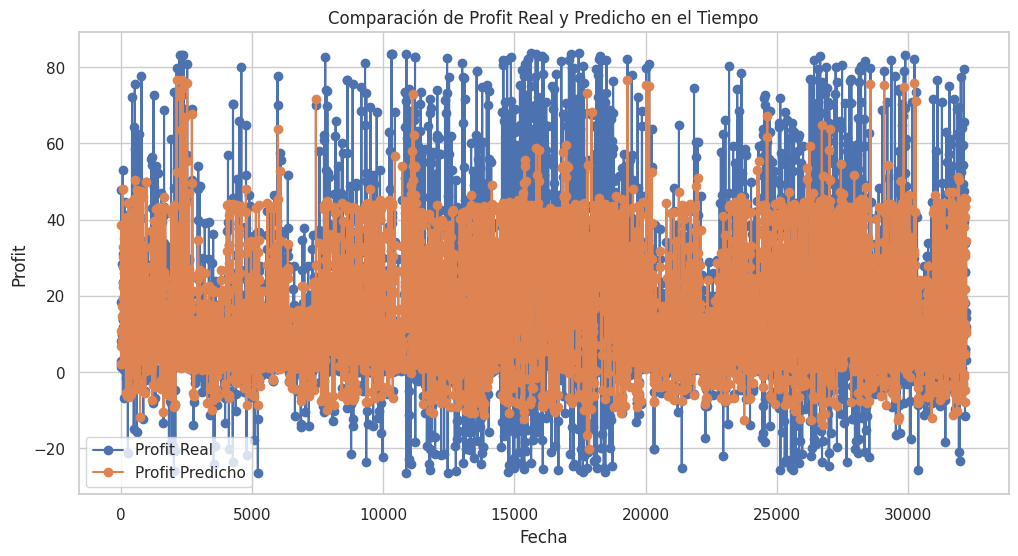

In [ ]:
# Crear un DataFrame con las fechas y los valores reales y predichos del profit
result_df = pd.DataFrame({
    'Fecha': X_test.index,  # Asumiendo que el índice de X_test son las fechas
    'Profit_Real': y_test.values,
    'Profit_Predicho': y_pred
})

# Ordenar el DataFrame por fecha
result_df = result_df.sort_values(by='Fecha')

# Graficar el tiempo contra el valor real y el valor predicho
plt.figure(figsize=(12, 6))
plt.plot(result_df['Fecha'], result_df['Profit_Real'], label='Profit Real', marker='o')
plt.plot(result_df['Fecha'], result_df['Profit_Predicho'], label='Profit Predicho', marker='o')
plt.title('Comparación de Profit Real y Predicho en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Profit')
plt.legend()
plt.show()


In [ ]:
 mse / y_test.mean()


11.949529210166917

In [ ]:
y_test

22144     9.7600
9389     20.5800
19075    20.6100
25463    26.1156
21031     0.3000
          ...   
6422     12.3600
22034    19.7910
6296      4.5188
4456      0.4200
3759     -0.6048
Name: profit, Length: 6446, dtype: float64

In [ ]:
X_test.tail()

n_ship_mode  n_segment  n_country  n_region  n_market  n_category  \
6422             2          0          3         1         4           1   
22034            3          0          4         3         5           1   
6296             3          1          4         8         5           1   
4456             3          0          3         0         1           1   
3759             3          0          4         8         5           1   

       n_sub-category  n_order_priority     sales  quantity  discount  \
6422                7                 2 -0.687041  0.067654 -0.564922   
22034               2                 1 -0.414512  0.067654  1.193035   
6296                2                 2 -0.816155 -0.552197  1.193035   
4456                2                 2 -0.918590 -1.172049 -0.564922   
3759                5                 2 -0.928572  0.067654  1.193035   

       shipping_cost  
6422       -0.845249  
22034      -0.197245  
6296       -0.794240  
4456       -0.832024  
3759       -0.862252

In [ ]:
# Agregar la columna de tiempo a X_test
X_test_with_time = X_test.copy()
X_test_with_time['order_date'] = df.loc[X_test.index, 'order_date']

# Supongamos que model es tu modelo entrenado
y_pred = best_rf.predict(X_test)

# Crear un DataFrame con las predicciones y la columna de tiempo
predictions_with_time = pd.DataFrame({'order_date': X_test_with_time['order_date'], 'predicted_profit': y_pred})

# Fusionar el DataFrame de predicciones con el DataFrame original
merged_df = pd.merge(df, predictions_with_time, on='order_date', how='left')

# Ahora merged_df contiene las predicciones y los valores reales junto con la información de tiempo


<ipython-input-125-02a4331474ba>:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


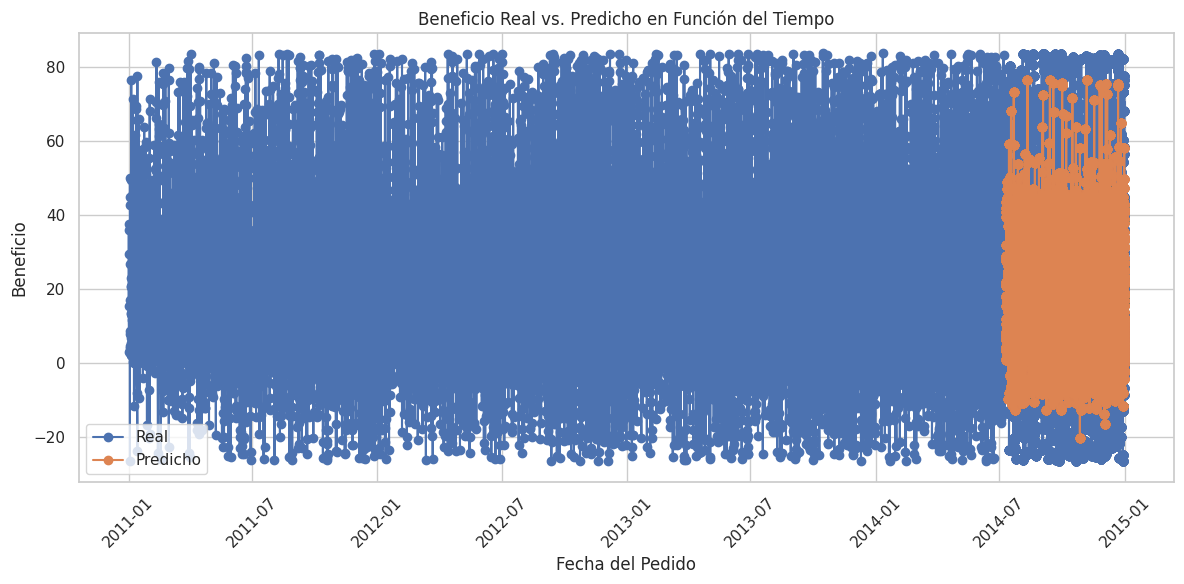

In [ ]:
import matplotlib.pyplot as plt

# Graficar el tiempo contra el beneficio real y predicho
plt.figure(figsize=(12, 6))
plt.plot(merged_df['order_date'], merged_df['profit'], label='Real', marker='o')
plt.plot(merged_df['order_date'], merged_df['predicted_profit'], label='Predicho', marker='o')
plt.title('Beneficio Real vs. Predicho en Función del Tiempo')
plt.xlabel('Fecha del Pedido')
plt.ylabel('Beneficio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


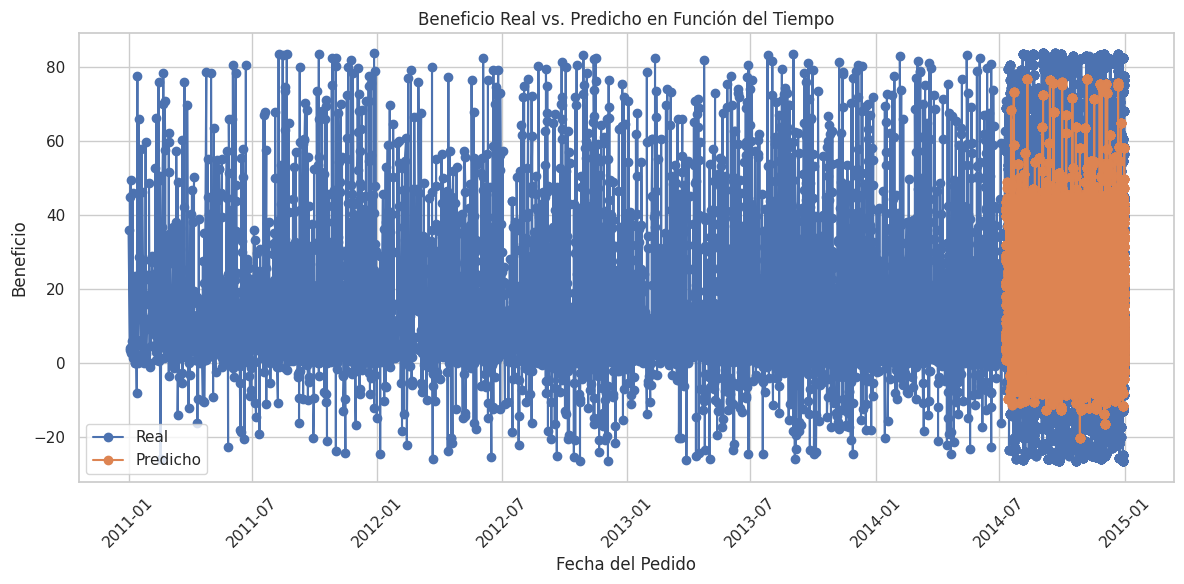

In [ ]:
# Muestrear cada N puntos para mejorar la legibilidad
n = 5
sampled_df = merged_df.iloc[::n, :]

# Graficar el tiempo contra el beneficio real y predicho
plt.figure(figsize=(12, 6))
plt.plot(sampled_df['order_date'], sampled_df['profit'], label='Real', marker='o')
plt.plot(sampled_df['order_date'], sampled_df['predicted_profit'], label='Predicho', marker='o')
plt.title('Beneficio Real vs. Predicho en Función del Tiempo')
plt.xlabel('Fecha del Pedido')
plt.ylabel('Beneficio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


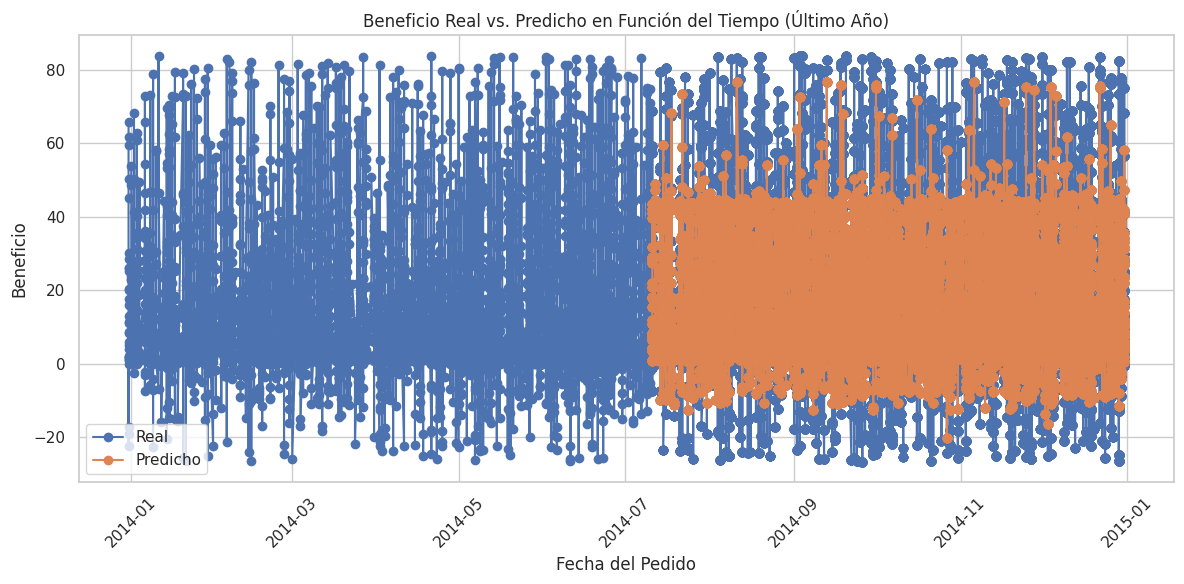

In [ ]:
# Filtrar datos para incluir solo el último año
last_year_df = merged_df[merged_df['order_date'] >= merged_df['order_date'].max() - pd.DateOffset(years=1)]

# Graficar el tiempo contra el beneficio real y predicho
plt.figure(figsize=(12, 6))
plt.plot(last_year_df['order_date'], last_year_df['profit'], label='Real', marker='o')
plt.plot(last_year_df['order_date'], last_year_df['predicted_profit'], label='Predicho', marker='o')
plt.title('Beneficio Real vs. Predicho en Función del Tiempo (Último Año)')
plt.xlabel('Fecha del Pedido')
plt.ylabel('Beneficio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X_test.tail()

n_ship_mode  n_segment  n_country  n_region  n_market  n_category  \
6422             2          0          3         1         4           1   
22034            3          0          4         3         5           1   
6296             3          1          4         8         5           1   
4456             3          0          3         0         1           1   
3759             3          0          4         8         5           1   

       n_sub-category  n_order_priority     sales  quantity  discount  \
6422                7                 2 -0.687041  0.067654 -0.564922   
22034               2                 1 -0.414512  0.067654  1.193035   
6296                2                 2 -0.816155 -0.552197  1.193035   
4456                2                 2 -0.918590 -1.172049 -0.564922   
3759                5                 2 -0.928572  0.067654  1.193035   

       shipping_cost  
6422       -0.845249  
22034      -0.197245  
6296       -0.794240  
4456       -0.832024  
3759       -0.862252

In [ ]:
data = {
    'n_ship_mode': [2, 3, 3, 3, 3],
    'n_segment': [0, 0, 1, 0, 0],
    'n_country': [3, 4, 4, 3, 4],
    'n_region': [1, 3, 8, 0, 8],
    'n_market': [4, 5, 5, 1, 5],
    'n_category': [1, 1, 1, 1, 1],
    'n_sub-category': [7, 2, 2, 2, 5],
    'n_order_priority': [2, 1, 2, 2, 2],
    'sales': [-0.687041, -0.414512, -0.816155, -0.918590, -0.928572],
    'quantity': [0.067654, 0.067654, -0.552197, -1.172049, 0.067654],
    'discount': [-0.564922, 1.193035, 1.193035, -0.564922, 1.193035],
    'shipping_cost': [-0.845249, -0.197245, -0.794240, -0.832024, -0.862252]
}

# Crea un DataFrame con los datos
new_X_test = pd.DataFrame(data)

# Visualiza el conjunto de prueba simulado
print(new_X_test)

   n_ship_mode  n_segment  n_country  n_region  n_market  n_category  \
0            2          0          3         1         4           1   
1            3          0          4         3         5           1   
2            3          1          4         8         5           1   
3            3          0          3         0         1           1   
4            3          0          4         8         5           1   

   n_sub-category  n_order_priority     sales  quantity  discount  \
0               7                 2 -0.687041  0.067654 -0.564922   
1               2                 1 -0.414512  0.067654  1.193035   
2               2                 2 -0.816155 -0.552197  1.193035   
3               2                 2 -0.918590 -1.172049 -0.564922   
4               5                 2 -0.928572  0.067654  1.193035   

   shipping_cost  
0      -0.845249  
1      -0.197245  
2      -0.794240  
3      -0.832024  
4      -0.862252  


In [ ]:
predictions = best_rf.predict(new_X_test)


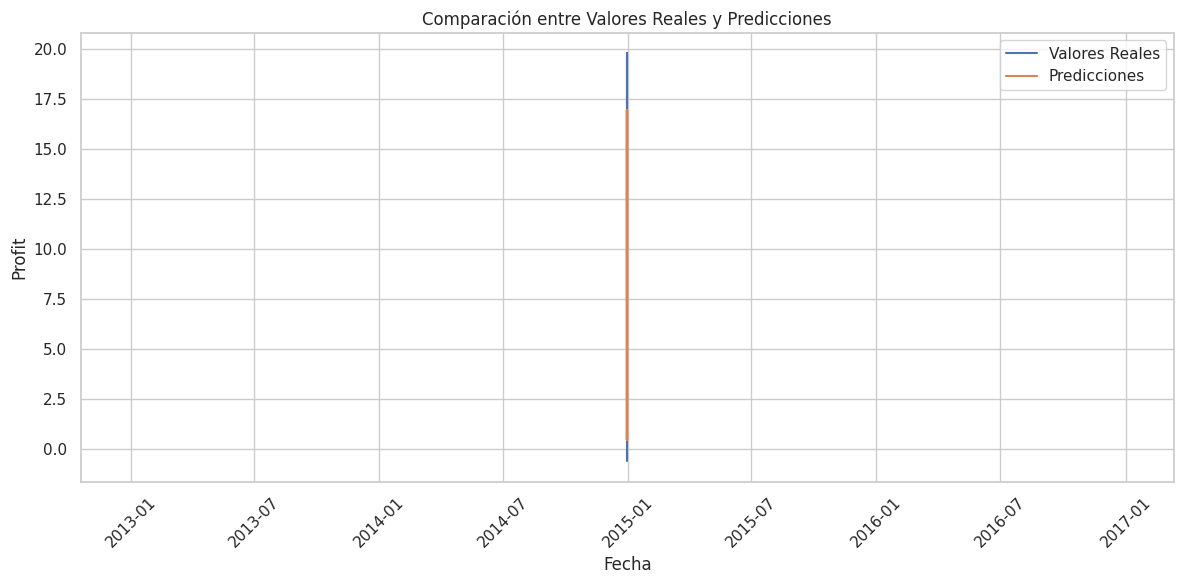

In [ ]:
# Agrega la columna de tiempo a new_X_test
new_X_test['order_date'] = df['order_date'].iloc[-len(new_X_test):].values

# Crea un DataFrame con las predicciones y la variable de tiempo
predictions_df = pd.DataFrame({'order_date': new_X_test['order_date'], 'predictions': predictions})

# Crea un DataFrame con los valores reales y la variable de tiempo
actuals_df = pd.DataFrame({'order_date': new_X_test['order_date'], 'actuals': y_test[-len(new_X_test):].values})

# Fusiona ambos DataFrames en uno solo
result_df = pd.merge(actuals_df, predictions_df, on='order_date', how='inner')

# Grafica el tiempo contra los valores reales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(result_df['order_date'], result_df['actuals'], label='Valores Reales')
plt.plot(result_df['order_date'], result_df['predictions'], label='Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Profit')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
X_train

n_ship_mode  n_segment  n_country  n_region  n_market  n_category  \
0                3          0          0         5         0           1   
13106            3          0          0         5         0           0   
25028            2          0          3         2         2           1   
1175             3          0          0         5         0           1   
18778            3          0          3         6         4           2   
...            ...        ...        ...       ...       ...         ...   
21191            3          0          3         4         3           1   
13142            3          2          0         5         0           0   
25722            2          0          3         6         0           0   
12806            3          0          4         3         5           1   
19736            2          0          3         6         0           1   

       n_sub-category  n_order_priority     sales  quantity  discount  \
0                  11                 2  0.283857  0.067654  0.314057   
13106               6                 2  0.214671  1.307358  0.314057   
25028              10                 1 -0.276636  0.687506 -0.564922   
1175                8                 2 -0.389032 -0.552197  0.314057   
18778               9                 2  2.286842 -1.172049 -0.564922   
...               ...               ...       ...       ...       ...   
21191               2                 1 -0.783132  0.067654 -0.564922   
13142               6                 2 -0.079369  0.067654  0.314057   
25722               6                 1 -0.083213 -0.552197 -0.564922   
12806              10                 2  1.061621  0.687506 -0.564922   
19736               8                 1 -0.803280 -1.172049 -0.564922   

       shipping_cost  
0           0.039853  
13106      -0.434342  
25028      -0.106562  
1175       -0.708280  
18778       1.398206  
...              ...  
21191      -0.692222  
13142      -0.804631  
25722      -0.053664  
12806      -0.053664  
19736      -0.638379  

[25782 rows x 12 columns]

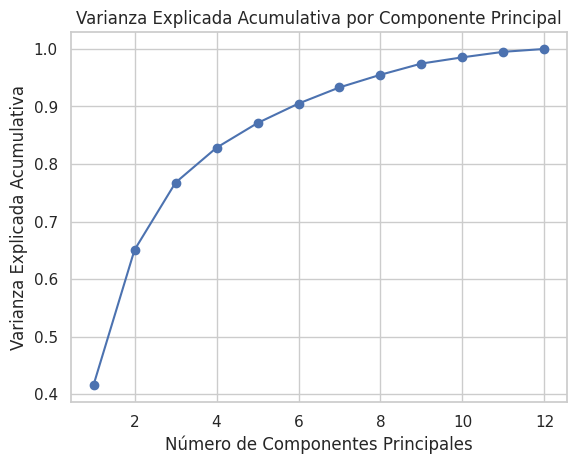

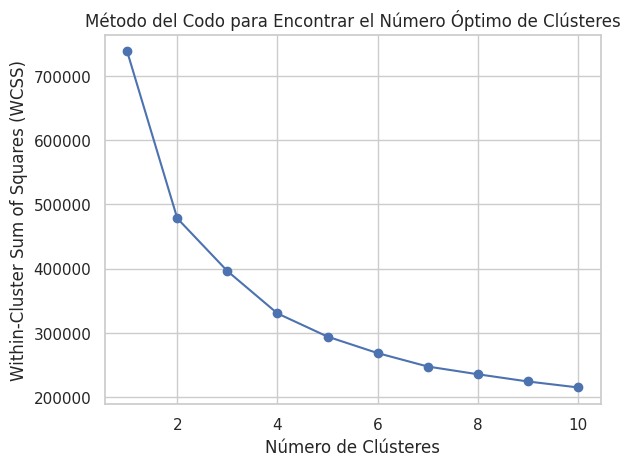

       cluster
0            2
13106        2
25028        0
1175         2
18778        2
...        ...
21191        1
13142        2
25722        2
12806        0
19736        2

[25782 rows x 1 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas para el clustering
numeric_cols = ['n_ship_mode', 'n_segment', 'n_country', 'n_region', 'n_market',
                'n_category', 'n_sub-category', 'n_order_priority', 'sales',
                'quantity', 'discount', 'shipping_cost']

# Seleccionar las variables para X_train
X_train_cluster = X_train[numeric_cols]


# Calcular la varianza explicada por cada componente principal
pca = PCA()
pca.fit(X_train_cluster)
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulativa
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componente Principal')
plt.show()

# Seleccionar el número óptimo de componentes principales basado en el codo
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_cluster)

# Aplicar k-means para encontrar el número óptimo de clústeres utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Método del Codo para Encontrar el Número Óptimo de Clústeres')
plt.show()

# Seleccionar el número óptimo de clústeres basado en el codo
optimal_num_clusters = 3  # Elegir el número óptimo de clústeres basado en el gráfico

# Aplicar k-means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
X_train['cluster'] = kmeans.fit_predict(X_train_pca)

# Mostrar el resultado
print(X_train[['cluster']])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar los puntos de cada clúster
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=X_train_pca, palette='viridis', s=50)

# Graficar los centros de cada clúster
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centro del Clúster')

# Configurar el gráfico
plt.title('Visualización de Clústeres')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
X_train_pca.shape

(25782, 8)

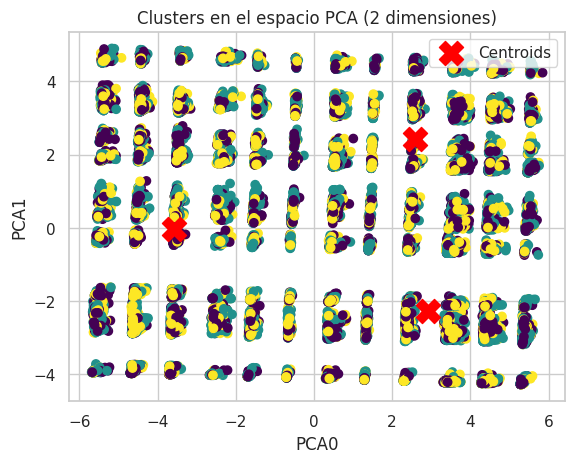

In [ ]:
# Crear DataFrame con las componentes principales
pca_columns = [f'pca{i}' for i in range(X_train_pca.shape[1])]
df_pca = pd.DataFrame(X_train_pca, columns=pca_columns)

# Añadir la columna 'cluster' al DataFrame si ya no está presente
if 'cluster' not in df_pca.columns:
    df_pca['cluster'] = X_train['cluster']

# Visualizar los clusters en el espacio PCA de 2 dimensiones
plt.scatter(df_pca['pca0'], df_pca['pca1'], c=df_pca['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('PCA0')
plt.ylabel('PCA1')
plt.title('Clusters en el espacio PCA (2 dimensiones)')
plt.legend()
plt.show()


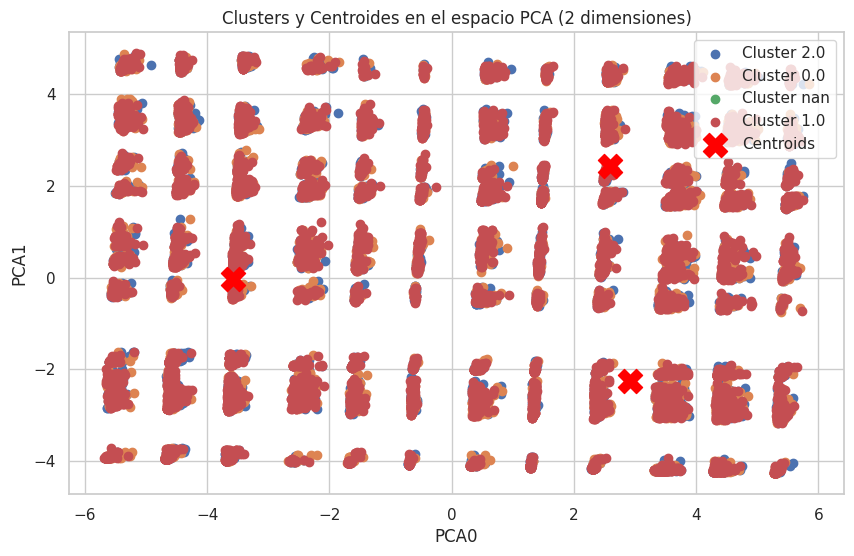

In [ ]:
# Visualizar los clusters y centroides en el espacio PCA de 2 dimensiones
plt.figure(figsize=(10, 6))

# Graficar los puntos de cada cluster
for cluster_label in df_pca['cluster'].unique():
    cluster_points = df_pca[df_pca['cluster'] == cluster_label]
    plt.scatter(cluster_points['pca0'], cluster_points['pca1'], label=f'Cluster {cluster_label}')

# Graficar los centroides de cada cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('PCA0')
plt.ylabel('PCA1')
plt.title('Clusters y Centroides en el espacio PCA (2 dimensiones)')
plt.legend()
plt.show()


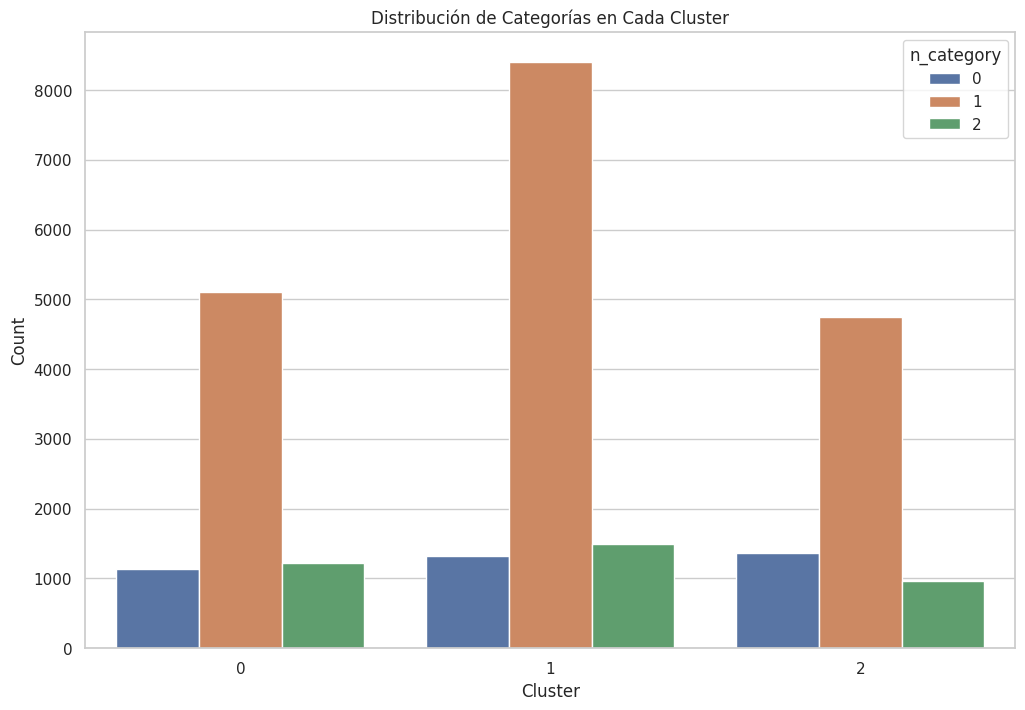

In [ ]:
# Agregar la columna 'cluster' al DataFrame original
X_train['cluster'] = kmeans.labels_

# Visualizar la distribución de las categorías en cada cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', hue='n_category', data=X_train)
plt.title('Distribución de Categorías en Cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [ ]:
# Filtrar registros para cada clúster
cluster_0 = X_train[X_train['cluster'] == 0]
cluster_1 = X_train[X_train['cluster'] == 1]
cluster_2 = X_train[X_train['cluster'] == 2]

# Mostrar las características de cada clúster
print("Características del Cluster 0:")
print(cluster_0.describe())

print("\nCaracterísticas del Cluster 1:")
print(cluster_1.describe())

print("\nCaracterísticas del Cluster 2:")
print(cluster_2.describe())


Características del Cluster 0:
       n_ship_mode    n_segment    n_country     n_region     n_market  \
count  7469.000000  7469.000000  7469.000000  7469.000000  7469.000000   
mean      2.277815     0.674120     2.917660     1.587495     3.165216   
std       1.071902     0.761873     0.845477     1.257866     1.374559   
min       0.000000     0.000000     1.000000     0.000000     1.000000   
25%       2.000000     0.000000     3.000000     1.000000     2.000000   
50%       3.000000     0.000000     3.000000     1.000000     3.000000   
75%       3.000000     1.000000     3.000000     2.000000     4.000000   
max       3.000000     2.000000     4.000000     4.000000     5.000000   

        n_category  n_sub-category  n_order_priority        sales  \
count  7469.000000     7469.000000       7469.000000  7469.000000   
mean      1.010845        8.487749          1.567412     0.117523   
std       0.561928        1.700851          0.620929     1.112688   
min       0.000000        

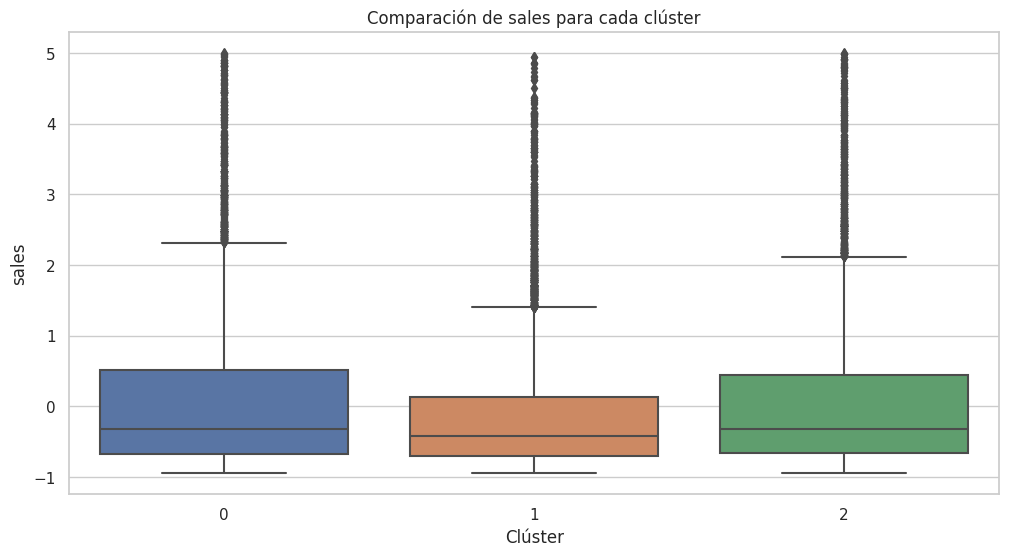

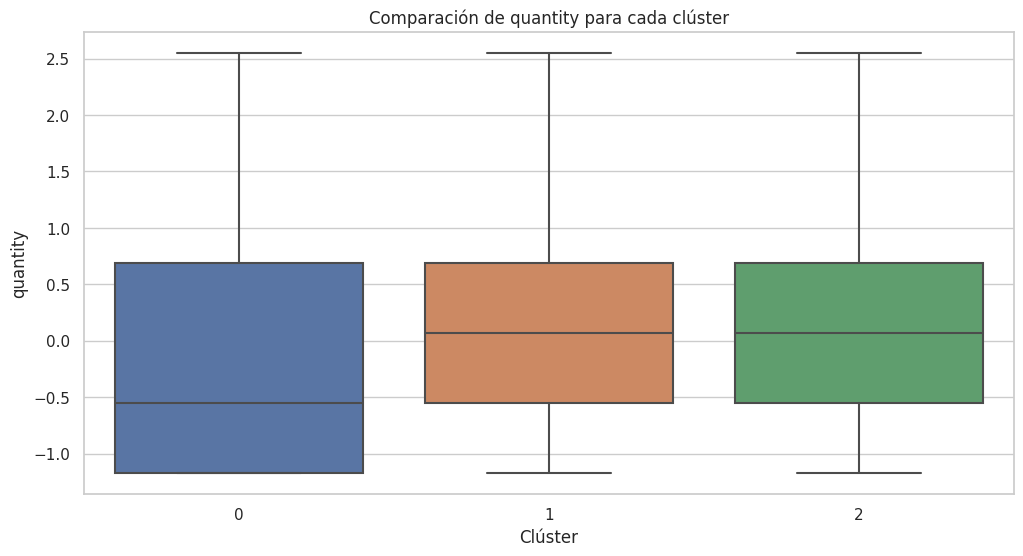

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Características a analizar
features = ['sales', 'quantity']

# Graficar comparación para cada característica
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='cluster', y=feature, data=X_train)
    plt.title(f'Comparación de {feature} para cada clúster')
    plt.xlabel('Clúster')
    plt.ylabel(feature)
    plt.show()


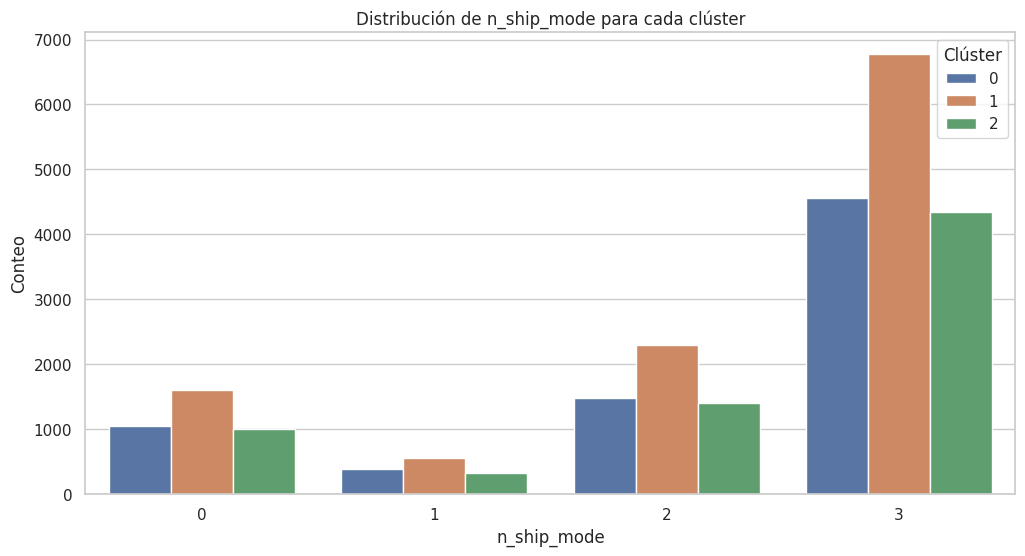

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Graficar comparación para n_ship_mode
plt.figure(figsize=(12, 6))
sns.countplot(x='n_ship_mode', hue='cluster', data=X_train)
plt.title('Distribución de n_ship_mode para cada clúster')
plt.xlabel('n_ship_mode')
plt.ylabel('Conteo')
plt.legend(title='Clúster')
plt.show()
